<a><img src="https://www.eafit.edu.co/SiteCollectionImages/logo.png" width="350" align="center"></a>
# Taller 1: Estadistica en Analitica

<hr style="border:2px solid #004B85"> </hr>

# Maestría en ciencia de los datos y analítica
## 12/05/2021
## Estudiantes

- **Camilo Rivera Bedoya**
- **Juan David Corea**
- **Jose Ignacio Escobar**
- **Eliana Marcela Sierra**
- **Daniel Romero Cardona**

<hr style="border:2px solid #004B85"> </hr>

# ¡¡¡Advertencia!!!

- este notebook fue desarrollado en Jupyter notebooks, el abrirlo con otros aplicativos como google colab u otros puede afectar el funconamiento del codigo o los markdowns.

<hr style="border:2px solid #004B85"> </hr>

<a name="conte"></a>
    
# Tabla de contenido
1. [Librerias y Funciones](#lib)
2. [MÓDULO DE CLASIFICACIÓN](#intro)
3. [Numeral 1](#1)
4. [Numeral 2](#2)
    1. [Apartado 1](#2_1)
    2. [Apartado 2](#2_2)
    3. [Apartado 3](#2_3)
    4. [Apartado 4](#2_4)
5. [Numeral 3](#3)
    1. [Apartado 1](#3_1)
    2. [Apartado 2](#3_2)
    3. [Apartado 3](#3_3)
6. [Numeral 4](#4)
    1. [Apartado 1](#4_1)
    2. [Apartado 2](#4_2)
    3. [Apartado 3](#4_3)
7. [Numeral 5](#5)
    1. [Apartado 1](#5_1)
    2. [Apartado 2](#5_2)
    3. [Apartado 3](#5_3)
    4. [Apartado 4](#5_4)
    5. [Apartado 5](#5_5)
    6. [Apartado 6](#5_6)
    7. [Apartado 7](#5_7)
8. [Numeral 6](#6)
    1. [Apartado 1](#6_1)
    2. [Apartado 2](#6_2)
    3. [Apartado 3](#6_3)
    4. [Apartado 4](#6_4)
9. [Numeral 7](#7)
    1. [Lectura y entendimiento de datos](#7_1)
    2. [Exploracion de Variables Categoricas - Binarias](#7_2)
    3. [Exploracion de Variables Numericas](#7_3)
    4. [Eliminacion de Variables por analisis grafico](#7_4)
    5. [Eliminacion de Variables por analisis de dependencias lineales](#7_5)
    6. [Preparacion de Datos](#7_6)
    7. [Division Entrenamiento - Testeo](#7_7)
    8. [Arbol de decision](#7_8)
    9. [K-NN](#7_9)
10. [Numeral 8](#8)
    1. [Apartado 1](#8_1)
    2. [Apartado 2](#8_2)

<a name="lib"></a><hr style="border:1px solid black"> </hr>
#  Librerias y Funciones [&#9673;](#conte)
<hr style="border:1px solid black"> </hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import funciones_Estadisticas as fe
import statsmodels.api as sm          
import statsmodels.formula.api as smf

In [2]:
def plot_conf_matrix(cm, classes,normalize,title,cmap=plt.cm.Blues):
    '''
    Funcion para graficar una matriz de confucion de un modelo de clasificacion supervisada
    
    input:
    -------------
    cm: Matriz de confusion del modelo
    Classes: Categorias de la matriz
    normalize: booleano que determina si se normaliza o no la matriz
    
    returns:
    -------------
    grafica de la matriz de confusion
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Verdaderos')
    plt.xlabel('Predecidos')
    plt.show()

In [3]:
def arb_dec (X,Y,porc_test):
    '''
    Funcion para declarar entrenar y testear un modelo de arbol de decision
    dado un porcentaje de los datos de entrenamiento
    
    input:
    -------------
    X: Matriz de Datos para el modelo
    Y: Matriz de resultados.
    porc_test: Porcentaje de registros para testeo.
    
    returns:
    -------------
    grafica de la matriz de confusion
    
    score_train: eficiencia de Entrenamiento
    score_test: eficiencia de Testeo
    '''
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=porc_test, random_state=123)
    Tree = DecisionTreeClassifier()
    Tree.fit(X_train,Y_train)
    pred_train = Tree.predict(X_train)
    pred_test = Tree.predict(X_test)
    score_train =  metrics.accuracy_score(Y_train, pred_train)
    score_test =  metrics.accuracy_score(Y_test, pred_test)
    return score_train, score_test

<a name="intro"></a><hr style="border:1px solid black"> </hr>
# MÓDULO DE CLASIFICACIÓN [&#9673;](#conte)

<hr style="border:1px solid black"> </hr>

Es notable que una ciencia que comenzó con consideraciones sobre juegos de azar haya llegado a ser el
objeto más importante del conocimiento humano.
Comprender y estudiar el azar es indispensable, porque la probabilidad es un soporte necesario para tomar
decisiones en cualquier ámbito Pierre-Simon Laplace.

<a name="1"></a><hr style="border:1px solid black"> </hr>
# Numeral 1 [&#9673;](#conte)
### Apuntes de Clase
<hr style="border:1px solid black"> </hr>

El reconocimiento de patrones o la discriminación consiste en predecir la naturaleza desconocida de una observación, en términos de una cantidad discreta como blanco o negro, uno o cero, enfermo o sano, real o falso.

Una observación es una colección de medidas numéricas, como una imagen, un vector de datos meteorológicos, o un electrocardiograma. Más formalmente, una observación es un vector ndimensional $X$. La naturaleza desconocida de la observación se llama clase. Se denota con $Y$ y toma valores en un conjunto ﬁnito $\{1,\ 2,\dots , M\}$. En el reconocimiento de patrones, uno crea una función $f(X):\mathbb{R}^n\rightarrow \{1,\ 2,\dots , M\}$ que representa la conjetura de $Y$ dado $X$. El mapeo $f$ se llama clasiﬁcador. El clasiﬁcador se equivoca en $X$ si $f(X)\neq Y$.

Especiﬁcar $f$ para un $X$ particular necesita del conocimiento propio y de la experiencia en la rama en donde fueron tomados los datos de las medidas (medicina, imágenes, etc). Un marco teórico aceptado es introducir un entorno probabilístico de la situación: sea $(X,Y)$ un par aleatorio $\mathbb{R}^n\times \{1,\ 2,\dots , M\}-$valuado.

La distribución de $(X,Y)$ en la práctica describe la frecuencia con la que se encuentran parejas particulares. Un error ocurre cuando $f(X)\neq Y$, y la *probabilidad de error* para un clasiﬁcador $f$ es:

$$L(f)=\mathbb{P}\{f(X)\neq Y\}$$

Existe el mejor clasiﬁcador posible, $f^*$, el cual se deﬁne como:

$$f^*=arg \begin{matrix}min\\{f:\mathbb{R}^n}\rightarrow \{1,\ 2,\dots , M\}\\\end{matrix}\mathbb{P}\{f(X)\neq Y\}$$

<a><img src="https://raw.githubusercontent.com/Camilorb07/Deep-Learning.ai/master/Est_Taller1_img.jpg" width="450" align="center"></a>

Observe que $f^*$ depende de la distribución de $(X,Y)$. Si se conoce esta distribución, se puede calcular $f^*$. El problema de encontrar $f^*$ se llama *el problema de Bayes*, y el clasiﬁcador $f^*$ se llama el *clasiﬁcador de Bayes* (o *la regla de Bayes*). La mínima probabilidad de error se llama el *error de Bayes* y se denota por $L^*=L(f^*)$. Por lo general la distribución de $(X,Y)$ es desconocida, asi que $f^*$ también es desconocida.

Aunque $f^*$ es desconocida, se tiene acceso a una base de datos de parejas $(X,Y),1\le i\le m$, observadas en el pasado. Esta base de datos puede ser el resultado de observaciones en la realización de experimentos (como por ejemplo datos metereológicos, ...). También pueden se pueden obtener por medio de un experto o profesor quien completó los $Y_is$ depués de haber visto los $X_is$. Para encontrar un clasiﬁcador $f$ con una probabilidad de error baja es necesario asumir algún tipo de comportamiento conjunto del par $(X_i,Y_i)$.

Una supuesto en este capitulo es que $(X_1,Y_1),\dots,(X_m,Y_m)$, Los datos, forman una sucesión de parejas aleatorias independientes identicamente distribuidas $(i.i.d.)$ que tienen la misma distribución de la pareja $(X,Y)$.

Un clasiﬁcador se construye con base a $X_1,Y_1,\dots,X_m,Y_m$ y se denota por $f_n$. Y se "adivina" con la expresión $f_n(X;X_1,Y_1,\dots,X_n,Y_n)$. El proceso de construir $f_n$ se llama *aprendizaje (learning)*, o *aprendizaje supervisado (supervised learning)*, o *aprendizaje con un profesor (learning with a teacher)*.

El desempeño de $f_n$ se mide con la *probabilidad de error* condicional.

$$L_m=L(f_m)=\mathbb{P}\{f_n(X;X_1,Y_1,\dots,X_m,Y_m)\neq Y|X_1,Y_1,\dots,X_m,Y_m\}$$

Esta es una variable aleatoria porque depende de los datos. O sea, $L_m$ pondera sobre la distribución de $(X,Y)$, pero los datos se mantienen ﬁjos. Es decir, en una aplicación particular a uno le toca trabajar con los datos realizados. Y en este sentido sería útil saber el número $\mathbb{E}[L_m]$ porque este número indica la calidad del promedio de una sucesión de datos, no de la sucesión particular de los datos.

Es así que el foco de $L_m$, se centra en la probabilidad condicional del error.

Un mapeo individual

$$f_m:\mathbb{R}^n\times \{\mathbb{R}^n \times \{1,2,\dots,M\}\}^m\rightarrow \{1,2,\dots,M\}$$

se sigue llamando un *clasiﬁcador*. Una sucesión $\{f_m,m\geq 1\}$ se llama una *regla (discriminación)*. Por lo
tanto, los clasiﬁcadores son funciones, y las reglas son sucesiones de funciones.

Una regla es consistente si

$$\lim_{m\rightarrow\infty}{\mathbb{E}\left[L_n\right]=L^*}$$

Una regla de clasiﬁcación consistente garantiza que se pueden usar cada vez más muestras para reconstruir la distribución desconocida de $(X,Y)$ porque $L_m$ se puede tomar tan cercano de $L^*$ como se necesite.

En otras palabras, se puede obtener una cantidad inﬁnita de información a partir de muestras ﬁnitas. La consistencia de una regla no impone condiciones sobre la distribución de $(X,Y)$ ya que estas condiciones no se pueden veriﬁcar. Si una regla es consistente para todas las distribuciones de $(X,Y)$, se dice que es universalmente consistente.

Hasta el año 1977 no se sabia si existia una regla universalmente consistente. En este año Stone mostró que la regla de clasiﬁcaión construida tomando cualesquiera k-vecinos más cercanos con $k=k(n)\rightarrow\infty$ y $k/n\rightarrow\infty$. Y construyendo el clasiﬁcador $f_m(x)$ tomando la mayoría de votos sobre los $Y_is$ en el subconjunto de los $k$ pares $(X_i,Y_i)$ de $(X_1,Y_1),\dots,(X_m,Y_m)$  que tienen los valores más pequeños para $||X_i-x||$ (o sea, los $X_i$ más cercanos a $x$). Desde la prueba de la consistencia universal de la regla [k-vecinos](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) más cercanos de Stone han surgido varias reglas de clasiﬁcación para las que se ha probado que son universalmente consistentes también.

El concepto de consistencia recae sobre la convergencia y se puede preguntar que tipo de convergencia se tiene: convergencia con probabilidad uno? convergencia en probabilidad? Esta es la tarea del probabilista. Por otro lado, existen la desigualdades de concentración del tipo de McDiarmid, las cuales proporcionan elementos necesarios y suﬁcientes que pueden probar la equivalencia entre varios tipos de convergencia en espacios de medida.

Por ejemplo, para la regla de *k-vecinos* más cercanos, existe un número $c>0$, tal que para todo $\epsilon>0$, existe $N(\epsilon)>0$ dependiente de la distribución de $(X,Y)$, tal que:

$$\mathbb{P}\{L_m-L^*>\epsilon\}\le e^{-cn\epsilon^2},\ \ n\geq N(\epsilon)$$

Como puede observarse esta desigualdad proporciona una cota para el desvio de $L_m$ con respecto a $L^*$. Este tipo de desigualdades son conocidas como [Desigualdades de concentración](https://en.wikipedia.org/wiki/Concentration_inequality).

Esto sugiere uno de los objetivos principales en el estudio teórico de los problemas de clasiﬁcación: estimar $L_m$ con los datos proporcionados.

Ahora solucionemos un ejercicio de clasificacion con la libreria statsmodel para sos siguientes datos:

In [4]:
X = np.array([[1, 1],[1, 5],[3, 6],[5, 3],[7, 1]])
Y = np.array([[1],[1],[0],[1],[0]])
X_test=np.array([[2,2]])

primero entreamos el modelo de clasificacion con los datos

In [5]:
log_reg = sm.Logit(Y, X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.653664
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 May 2021   Pseudo R-squ.:                 0.02875
Time:                        23:57:54   Log-Likelihood:                -3.2683
converged:                       True   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.6600
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1632      0.293     -0.556      0.578      -0.738       0.412
x2             0.1609      0.307      0.524      0.600      -0.441       0.763
==============================================================================
"""

ahora ingresemos el punto de testeo para ver en que categoriaes clasificado

In [6]:
y_estimado = log_reg.predict(X_test)
print('La clase estimada es: ',list(map(round, y_estimado))[0])

La clase estimada es:  0


<a name="2"></a><hr style="border:1px solid black"> </hr>
# Numeral 2 [&#9673;](#conte)
### Calentamiento

1. [Apartado 1](#2_1)
2. [Apartado 2](#2_2)
3. [Apartado 3](#2_3)
4. [Apartado 4](#2_4)

<hr style="border:1px solid black"> </hr>

Para comenzar te sugiero que hagas los cálculos en detalle para comprender el funcionamiento del método. La actividad consiste en construir un clasiﬁcador usando la técnica de *k-vecinos* más cercanos usando como conjunto de entrenamiento los patrones descritos en la siguiente matriz $X$ con etiquetas dadas en el vector $Y$.

$$X=\begin{bmatrix}0.8&0.8\\0.8&1.2\\3.8&2.8\\4.2&3.2\\1.0&1.0\\1.2&1.2\\4.2&2.8\\4.4&2.8\\3.5&1.0
\\4.0&1.0\\3.8&0.5\\4.0&0.7\\\end{bmatrix}\ \ ,\ \ Y=\begin{bmatrix}1\\1\\2\\2\\1\\1\\2\\2\\3\\3\\3\\3\\\end{bmatrix}$$

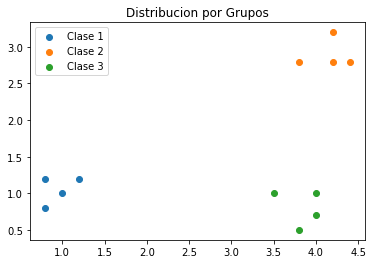

In [7]:
#declaramos las matrices para el ejercicio y grafiquemos los dats para vsualizarlos mejor
X = np.array([[0.8, 0.8],[0.8, 1.2],[3.8, 2.8],[4.2, 3.2],[1.0, 1.0],[1.2, 1.2],
              [4.2, 2.8],[4.4, 2.8],[3.5, 1.0],[4.0, 1.0],[3.8, 0.5],[4.0, 0.7]])
Y = np.array([[1],[1],[2],[2],[1],[1],[2],[2],[3],[3],[3],[3]])
plt.scatter(X[np.where(Y == 1)[0],0], X[np.where(Y == 1)[0],1], label = 'Clase 1')
plt.scatter(X[np.where(Y == 2)[0],0], X[np.where(Y == 2)[0],1], label = 'Clase 2')
plt.scatter(X[np.where(Y == 3)[0],0], X[np.where(Y == 3)[0],1], label = 'Clase 3')
plt.title('Distribucion por Grupos')
plt.legend()
plt.show()

<a name="2_1"></a>
### 2.1 [&#9678;](#2) Calcule la precisión en el conjunto de entrenamiento.
<hr style="border:1px solid black"> </hr>

In [8]:
D = [] #matriz dedistancias
filas, columnas = X.shape
### Calculo de la distancia de cada punto con el resto 
for i in range(0,filas):
    Dist=[] #vector de distancias de punto especifico
    for j in range(0,filas):
        if i == j:
            Dist.append(0) #si es la distancia al mismo punto
        else: 
            Dist.append(np.linalg.norm(X[i]-X[j],2))
    D.append(Dist)
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.400000,3.605551,4.161730,0.282843,0.565685,3.944617,4.118252,2.707397,3.206244,3.014963,3.201562
1,0.400000,0.000000,3.400000,3.944617,0.282843,0.400000,3.757659,3.939543,2.707397,3.206244,3.080584,3.238827
2,3.605551,3.400000,0.000000,0.565685,3.328663,3.052868,0.400000,0.600000,1.824829,1.811077,2.300000,2.109502
3,4.161730,3.944617,0.565685,0.000000,3.883298,3.605551,0.400000,0.447214,2.308679,2.209072,2.729469,2.507987
4,0.282843,0.282843,3.328663,3.883298,0.000000,0.282843,3.671512,3.847077,2.500000,3.000000,2.844293,3.014963
5,0.565685,0.400000,3.052868,3.605551,0.282843,0.000000,3.400000,3.577709,2.308679,2.807134,2.692582,2.844293
6,3.944617,3.757659,0.400000,0.400000,3.671512,3.400000,0.000000,0.200000,1.931321,1.811077,2.334524,2.109502
7,4.118252,3.939543,0.600000,0.447214,3.847077,3.577709,0.200000,0.000000,2.012461,1.843909,2.376973,2.137756
8,2.707397,2.707397,1.824829,2.308679,2.500000,2.308679,1.931321,2.012461,0.000000,0.500000,0.583095,0.583095
9,3.206244,3.206244,1.811077,2.209072,3.000000,2.807134,1.811077,1.843909,0.500000,0.000000,0.538516,0.300000


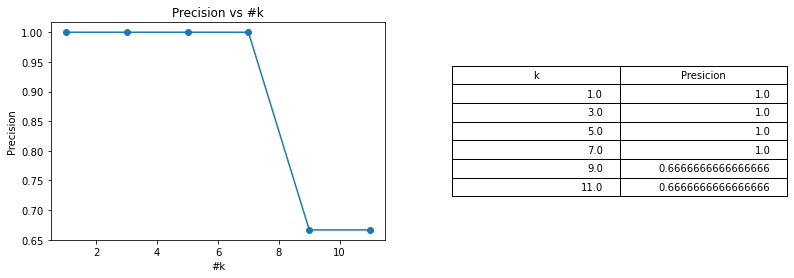

In [9]:
Press=[]
for k in [1,3,5,7,9,11]:
    Y_hat =[]
    for i in range(0,filas):
        d_sort=np.array(D[i].copy())
        neigh = list(np.argsort(d_sort))
        K_neigh = neigh[0:k]
        Class_Kn= Y[K_neigh]
        Class_X = int(stats.mode(Class_Kn).mode)
        Y_hat.append(Class_X)
    Eva= [1 if Y[i]==Y_hat[i] else 0 for i in range(0,filas)]
    Press.append((k,sum(Eva)/len(Eva)))
precision = pd.DataFrame(Press,columns=['k','Presicion'])
plt.plot(precision['k'],precision['Presicion'],'-o')
plt.title('Precision vs #k')
plt.xlabel('#k')
plt.ylabel('Precision')
plt.table(cellText = precision.values, colLabels=precision.columns,loc='right', bbox=[1.2,0.2,1,.6])
plt.show()

<a name="2_2"></a>
### 2.2 [&#9678;](#2) Calcule la predicción para el punto de testeo $P=(3.0,2.0)$.
<hr style="border:1px solid black"> </hr>

Graficamos el punto nuevo junto con los demas datos

In [10]:
X_test=np.array([[3.0,2.0]])

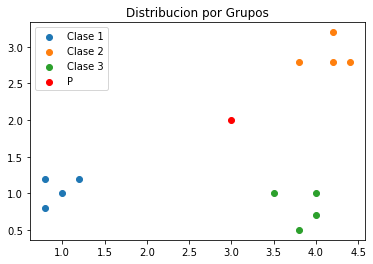

In [11]:
plt.scatter(X[np.where(Y == 1)[0],0], X[np.where(Y == 1)[0],1], label = 'Clase 1')
plt.scatter(X[np.where(Y == 2)[0],0], X[np.where(Y == 2)[0],1], label = 'Clase 2')
plt.scatter(X[np.where(Y == 3)[0],0], X[np.where(Y == 3)[0],1], label = 'Clase 3')
plt.scatter(X_test[:,0], X_test[:,1], color='red', label = 'P')
plt.title('Distribucion por Grupos')
plt.legend()
plt.show()

In [12]:
D_predict=[]
for j in range(0,filas):
    D_predict.append(np.linalg.norm(X_test-X[j],2))
Y_hat =[]    
for k in [1,5]:
    d_sort=np.array(D_predict.copy())
    neigh = list(np.argsort(d_sort))
    K_neigh = neigh[0:k]
    Class_Kn= Y[K_neigh]
    Class_X = int(stats.mode(Class_Kn).mode)
    Y_hat.append(Class_X)
pd.DataFrame([[1,Y_hat[0]],[5,Y_hat[1]]], columns = ['K', 'Cluster'])

,K,Cluster
0,1,3
1,5,2


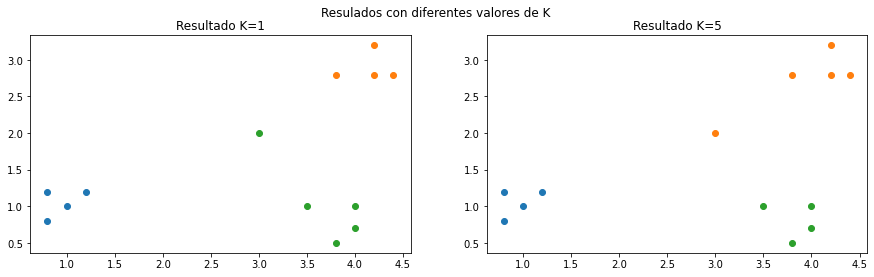

In [13]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
fig.suptitle('Resulados con diferentes valores de K')
axs[0].scatter(X[np.where(Y == 1)[0],0], X[np.where(Y == 1)[0],1], label = 'Clase 1')
axs[0].scatter(X[np.where(Y == 2)[0],0], X[np.where(Y == 2)[0],1], label = 'Clase 2')
axs[0].scatter(np.append(X[np.where(Y == 3)[0],0],X_test[:,0]),np.append(X[np.where(Y==3)[0],1],X_test[:,1]),label='Clase 3')
axs[0].set_title('Resultado K=1')
axs[1].scatter(X[np.where(Y == 1)[0],0], X[np.where(Y == 1)[0],1], label = 'Clase 1')
axs[1].scatter(np.append(X[np.where(Y == 2)[0],0],X_test[:,0]),np.append(X[np.where(Y == 2)[0],1],X_test[:,1]),label='Clase 2')
axs[1].scatter(X[np.where(Y == 3)[0],0], X[np.where(Y == 3)[0],1], label = 'Clase 3')
axs[1].set_title('Resultado K=5')
plt.show()

<a name="2_3"></a>
### 2.3 [&#9678;](#2) Experimenta con qué valor de k se obtinen la mejor precisión.
<hr style="border:1px solid black"> </hr>

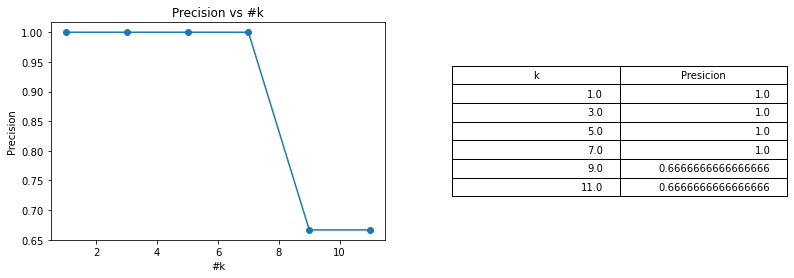

In [14]:
plt.plot(precision['k'],precision['Presicion'],'-o')
plt.title('Precision vs #k')
plt.xlabel('#k')
plt.ylabel('Precision')
plt.table(cellText = precision.values, colLabels=precision.columns,loc='right', bbox=[1.2,0.2,1,.6])
plt.show()

**Conclusion:** para los k=1,3,5 se obtiene una precision del 100% (perfecta), esto se puede explicar si miramos la grafica de distribucion de los grupos, en la cual se observa que los grupos estan notablemente separados, una vez en numero de k crece y se empiezan a tener en cuenta puntos muy alejados desu conjunto original la precision del modelo baja como se observa en la grafica anterior.

<a name="2_4"></a>
### 2.4 [&#9678;](#2) Vecinos más cercanos con distancia ponderada: este es un algoritmo similar a $kNN$, la única diferencia es que estos $k$ vecinos más cercanos se ponderan de acuerdo con su distancia desde el punto de prueba. Cada uno de los vecinos está asociado con el peso $w$ que se deﬁne como: 
### $$w_j=\left\{\begin{matrix}\frac{d_k-d_j}{d_k-d_1}&si\ d_k\neq d_1\\1&si\ d_k=d_1\\\end{matrix}\right.$$
### donde $j=1,2,\dots,k$. Después de calcular los $w_j$ , el algoritmo asigna al patrón de testeo $P$ la clase para la cual la suma de las ponderaciones de los $k-vecinos$ más próximos sea la mayor. Testear con el punto $P(3,2)$ tomando $k=1$ y $k=5$.
<hr style="border:1px solid black"> </hr>

In [15]:
D_predict=[]
for j in range(0,filas):
    D_predict.append(np.linalg.norm(X_test-X[j],2))

In [16]:
KNN_POND=[]
for k in [1,5]:
    D_weight=[]
    d_sort=np.array(D_predict.copy())
    neigh = list(np.argsort(d_sort))
    d_5 = neigh[0:k]
    d_n = list(np.array(D_predict)[d_5])
    d_1=min(d_n)
    d_k=max(d_n)
    for i in range(0,k):
        if d_1 == d_k:
            D_weight.append(1)
        else:
            D_weight.append((d_k - d_n[i])/(d_k-d_1))
    Y_Class= [int(i) for i in Y[d_5]]
    Y_pond =pd.DataFrame([[Y_Class[i],D_weight[i]] for i in range(0,k)])
    Y_pond1= [[Y_Class[i],D_weight[i]] for i in range(0,k)]
    Y_TOP =pd.DataFrame(Y_pond.groupby(by=0).sum().sort_values(by=0,ascending=False).head(1))[1].index[0]
    KNN_POND.append(Y_TOP)
pd.DataFrame([[1,KNN_POND[0]],[5,KNN_POND[1]]], columns = ['K', 'Cluster'])

,K,Cluster
0,1,3
1,5,3


Ahora grafiquemos los nuevos grupos

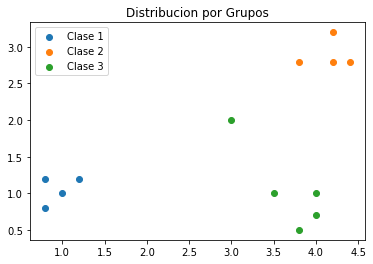

In [17]:
plt.scatter(X[np.where(Y == 1)[0],0], X[np.where(Y == 1)[0],1], label = 'Clase 1')
plt.scatter(X[np.where(Y == 2)[0],0], X[np.where(Y == 2)[0],1], label = 'Clase 2')
plt.scatter(np.append(X[np.where(Y == 3)[0],0],X_test[:,0]), np.append(X[np.where(Y == 3)[0],1],X_test[:,1]), label = 'Clase 3')
plt.title('Distribucion por Grupos')
plt.legend()
plt.show()

<a name="3"></a><hr style="border:1px solid black"> </hr>
# Numeral 3 [&#9673;](#conte)
### Ejercicio de implementación

1. [Apartado 1](#3_1)
2. [Apartado 2](#3_2)
3. [Apartado 3](#3_3)

<hr style="border:1px solid black"> </hr>

<a name="3_1"></a>
### 3.1 [&#9678;](#3) Implementar el algoritmo de clasiﬁcación KNN. Valide con los datos del problema 1 (el de calentamiento).
<hr style="border:1px solid black"> </hr>

In [18]:
scores =[]
preds = []
ks = [1,3,5,7,9,11]
for k in ks:    
    knn = KNeighborsClassifier(k)
    knn.fit(X, Y.ravel())
    scores.append(knn.score(X, Y))
    preds.append(knn.predict(X_test)[0])

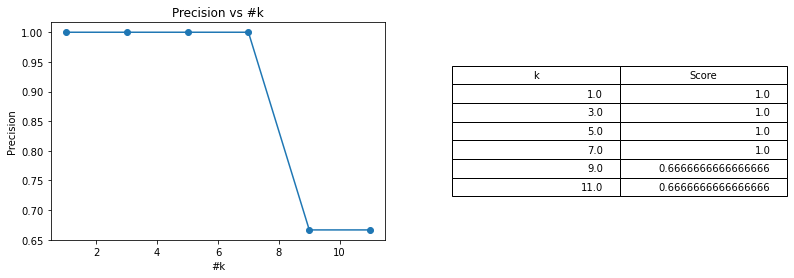

In [19]:
plt.plot(ks,scores,'-o')
plt.title('Precision vs #k')
plt.xlabel('#k')
plt.ylabel('Precision')
plt.table(cellText =np.column_stack([ks,scores]), colLabels=['k','Score'],loc='right', bbox=[1.2,0.2,1,.6])
plt.show()

<a name="3_2"></a>
### 3.2 [&#9678;](#3) Para este ejercicio use la base de datos *DatosFisher.xlsx* disponible en la página del curso.
<hr style="border:1px solid black"> </hr>

In [20]:
datos = pd.read_excel('DatosFisher.xlsx',skiprows=1).iloc[:,:8]
datos.head(3)

,sexo,estatura,peso,longitudpie,longitudbrazo,anchuraespalda,diametrocraneo,longitudrodillatobillo
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0


In [21]:
datos.shape

(27, 8)

In [22]:
X= datos[['estatura', 'peso', 'longitudpie', 'longitudbrazo','anchuraespalda', 'diametrocraneo', 'longitudrodillatobillo']]
Y = datos['sexo']

<a name="3_3"></a>
### 3.3 [&#9678;](#3) Seleccione el k para el cual el error de entrenamiento sea mínimo. k =?
<hr style="border:1px solid black"> </hr>

In [23]:
scores =[]
ks = [1,3,5,7,9,11,13,15,17,19]
for k in ks:    
    knn = KNeighborsClassifier(k)
    knn.fit(X, Y)
    scores.append(knn.score(X, Y))
errores = 1-np.array(scores)

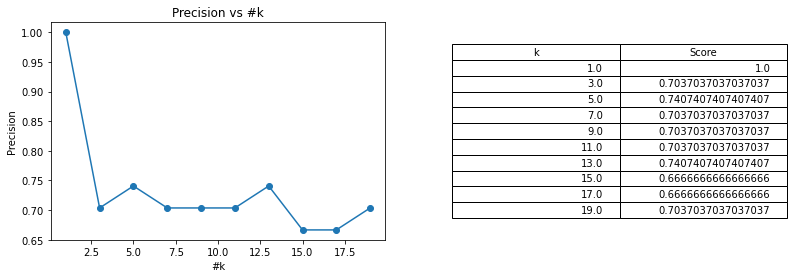

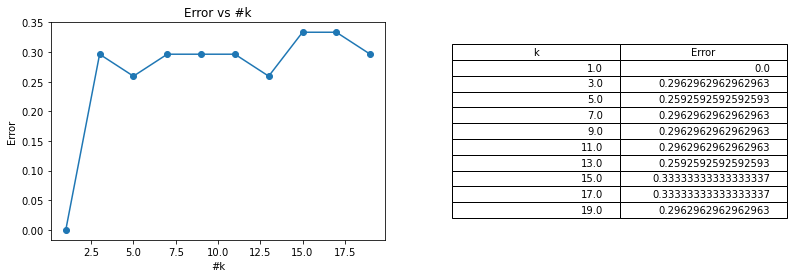

In [24]:
plt.plot(ks,scores,'-o')
plt.title('Precision vs #k')
plt.xlabel('#k')
plt.ylabel('Precision')
plt.table(cellText =np.column_stack([ks,scores]), colLabels=['k','Score'],loc='right', bbox=[1.2,0.1,1,.8])
plt.show()
plt.plot(ks,errores,'-o')
plt.title('Error vs #k')
plt.xlabel('#k')
plt.ylabel('Error')
plt.table(cellText =np.column_stack([ks,errores]), colLabels=['k','Error'],loc='right', bbox=[1.2,0.1,1,.8])
plt.show()

**Conclusion:** se observa que ademas de $K = 1$  el menor error de entrenamiento se presenta cuando $k = 5$ y $k = 13$, por lo que se bajo este criterio se debe seleccionar **5** como el valor de k ya que precenta el mismo resultado que **13** pero es mas eficiente computacionalmente.

<a name="4"></a><hr style="border:1px solid black"> </hr>
# Numeral 4 [&#9673;](#conte)
### Ejercicio de implementación

1. [Apartado 1](#4_1)
2. [Apartado 2](#4_2)
3. [Apartado 3](#4_3)

<hr style="border:1px solid black"> </hr>

<a name="4_1"></a>
### 4.1 [&#9678;](#4) Construir un script para usar el algoritmo de árboles de decisión y ajustar un modelo de clasiﬁcación para los datos *DatosFisher.xlsx*.
<hr style="border:1px solid black"> </hr>

para este modelo decidimos hacer una divicion d elos datos en entrenamiento y testeo en una proporcion de $70:30$ para hacer esta division utilizamos la siguiente funcion: 

In [25]:
# Dividimos los datos en entrenamiento y testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

ahora que los datos estan divididos procedemos a declarar y entrenar el modelo con los datos de entrenamiento

In [26]:
# Declaramos el modelo
Tree = DecisionTreeClassifier()

# Entrenamos el modelo con los datos de entrenamiento
Tree.fit(X_train,Y_train)

DecisionTreeClassifier()

ahora procedemos a hacer la prediccion de los datos de testeo y a calcular la precision del modelo

In [27]:
# Con el modelo entrenado hacemos la prediccion con los datos de testeo
predTree = Tree.predict(X_test)

# Calculamos la precision del modelo
print("Precision alcanzada con el arbol de decision: ", metrics.accuracy_score(Y_test, predTree))

Precision alcanzada con el arbol de decision:  0.8888888888888888


ahora graficamos el arbol de decision resultante del modelo implementado

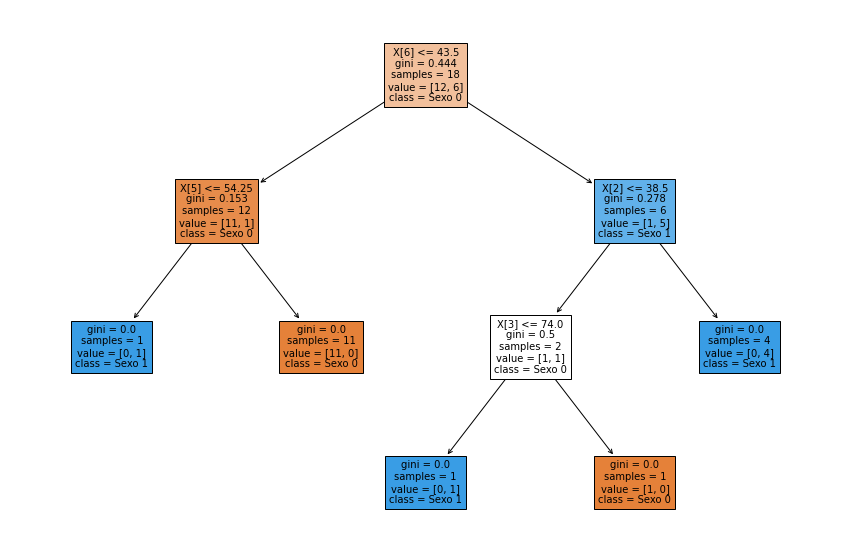

In [28]:
# Graficamos el arbol de decision 
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(Tree, ax=ax, filled = True,fontsize=10, class_names = ['Sexo 0','Sexo 1'])
plt.show()

Finalmente graficamos la matriz de confusion y la matriz de confusion normalizada del modelo implementado con los datos de testeo

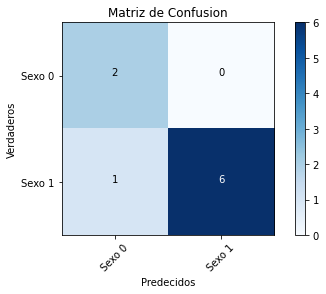

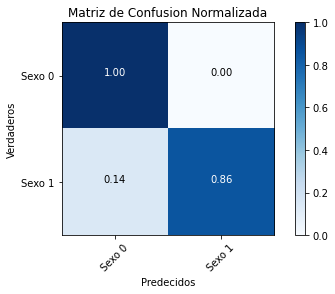

In [29]:
cm = confusion_matrix(Y_test, predTree)
plot_conf_matrix(cm, classes=["Sexo 0","Sexo 1"],normalize= False,  title='Matriz de Confusion')
plot_conf_matrix(cm, classes=["Sexo 0","Sexo 1"],normalize= True,  title='Matriz de Confusion Normalizada')

<a name="4_2"></a>
### 4.2 [&#9678;](#4) Construya la gráﬁca donde se aprecie el error de entrenamiento y el error de testeo para diferentes tamaños del conjunto de entrenamiento.
<hr style="border:1px solid black"> </hr>

primero creamos una funcion que entrene y testee un modelo de arboles de decision con un porcentaje de valores de testeo dado, esta funcion la podra encontrar al inicio del documento en la seccion de ["Librerias y Funciones"](#lib)

posteriormente corremos multiples veces el modelo con diferentes valores de porcentaje de datos de entrenamiento.

In [30]:
#se declara listas donde se almacenaran los scores de entrenamiento y testeo de los diferentes modelos
train_scores = []
test_scores = []

porcentajes = np.array(range(100,901,10))/1000 #lista de porcentajes de entrenamiento (10 a 90 % de 1 en 1)
for i in porcentajes:
    score_train, score_test = arb_dec(X,Y,i)
    train_scores.append(score_train)
    test_scores.append(score_test)

ahora graficamos la evolucion de la precision del modelo

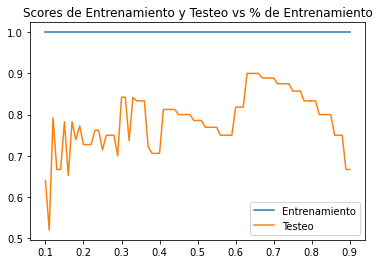

In [31]:
plt.plot(porcentajes, train_scores, label='Entrenamiento')
plt.plot(porcentajes, test_scores, label = 'Testeo')
plt.title('Scores de Entrenamiento y Testeo vs % de Entrenamiento')
plt.legend()
plt.show()

Finalmente graficamos la evolucion del error del modelo (lo inverso a la grafica anterior)

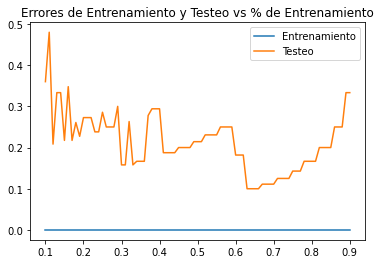

In [32]:
plt.plot(porcentajes, 1 - np.array(train_scores), label='Entrenamiento')
plt.plot(porcentajes, 1 - np.array(test_scores), label = 'Testeo')
plt.title('Errores de Entrenamiento y Testeo vs % de Entrenamiento')
plt.legend()
plt.show()

Ahora determinamos cual fue el caso de menor error en los datos de testeo

In [33]:
best_case = porcentajes[test_scores.index(max(test_scores))]
print('el mejor resultado para los datos de testeo se dan cuando se tiene un total del ',best_case*100,
     ' % de datos de Entrenamiento y un ',(1 - best_case)*100,' % de Datos Para Testeo')

el mejor resultado para los datos de testeo se dan cuando se tiene un total del  63.0  % de datos de Entrenamiento y un  37.0  % de Datos Para Testeo


Ahora corremos el modelo para este caso para observar el arbol y las matrices de confusion

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=best_case, random_state=123)
Tree = DecisionTreeClassifier()
Tree.fit(X_train,Y_train)
predTree = Tree.predict(X_test)
print("Precision alcanzada con el arbol de decision: ", metrics.accuracy_score(Y_test, predTree))

Precision alcanzada con el arbol de decision:  0.9


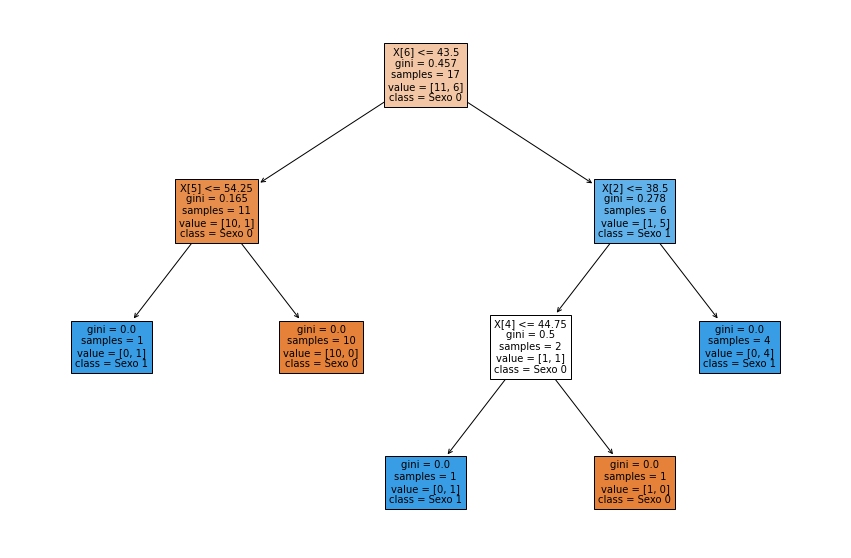

In [35]:
# Graficamos el arbol de decision 
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(Tree, ax=ax, filled = True,fontsize=10, class_names = ['Sexo 0','Sexo 1'])
plt.show()

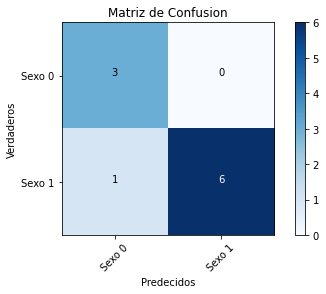

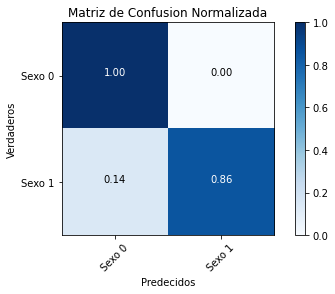

In [36]:
cm = confusion_matrix(Y_test, predTree)
plot_conf_matrix(cm, classes=["Sexo 0","Sexo 1"],normalize= False,  title='Matriz de Confusion')
plot_conf_matrix(cm, classes=["Sexo 0","Sexo 1"],normalize= True,  title='Matriz de Confusion Normalizada')

<a name="4_3"></a>
### 4.3 [&#9678;](#4) Puede plantear alguna hipótesis sobre el comportamiento de estos dos errores a medida que el tamaño del conjunto de entrenamiento aumenta?
<hr style="border:1px solid black"> </hr>

para este analisis retomamos la grafica de error anterior

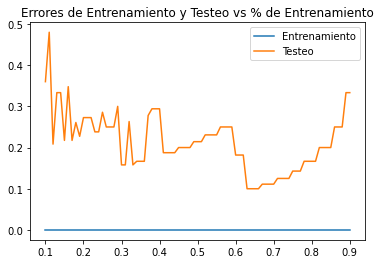

In [37]:
plt.plot(porcentajes, 1 - np.array(train_scores), label='Entrenamiento')
plt.plot(porcentajes, 1 - np.array(test_scores), label = 'Testeo')
plt.title('Errores de Entrenamiento y Testeo vs % de Entrenamiento')
plt.legend()
plt.show()

**Error de Entrenamiento**

para el modelo de arboles de decision se obtiene que el error de entrenamiento siempre sera cero ya que como el modelo fue entrenado con los mismos datos que se evaluan estos toman el mismo camino que se traza en el entrenamiento del modelo, por lo que el error siempre se mantiene en 0 sin importar que porcentaje de datos de entrenamiento se tomen.

**Error de testeo**

en el inicio de la grafica se observa que al tener pocos datos de entrenamiento para el modelo es muy dificil que este llegue a dar buenas respuestas para los datos de testeo ya que no se ha logrado que el modelo describa la realidad con tan pocos datos de entrenamiento, a medida que los datos de entrenamiento aumentan el error del modelo disminuye hasta llegar a su minimo, despues de este punto el error del modelo vuelve a aumentar, esto se debe a que el modelo empieza a estar sobre entrenado (overfited) pore lo que el modelo se vuelve inadecuado para ingresar nuevos datos.

<a name="5"></a><hr style="border:1px solid black"> </hr>
# Numeral 5 [&#9673;](#conte)
### Descripción de datos multivariantes

1. [Apartado 1](#5_1)
2. [Apartado 2](#5_2)
3. [Apartado 3](#5_3)
4. [Apartado 4](#5_4)
5. [Apartado 5](#5_5)
6. [Apartado 6](#5_6)
7. [Apartado 7](#5_7)

<hr style="border:1px solid black"> </hr>

Tener en cuenta que la matriz de datos $X_{m\times n}$ tiene $m$ ﬁlas y $n$ columnas. Las ﬁlas de la matriz se denotan
por $X^{(1)},X^{(2)},\dots,X^{(m)}$, y las columnas se denotan por $X_1,X_2,\dots,X_n$. Las ﬁlas represnetan los ejemplos
y las columnas representan las variables medidas en cada ejemplo.

Para los datos del archivo *ELE.xlsx* hacer un análisis descriptivo de datos multivariantes usando como guía la siguiente lista de actividades:

En cada caso se puede usar una función de cualquier paquete de software pero también se puede construir la función con la fórmula dada en clase y en este documento.

In [38]:
data = pd.read_excel('ELE.xlsx').iloc[:,:-2].select_dtypes(include='number')
data.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


<a name="5_1"></a>
### 5.1 [&#9678;](#5) Estudiar el tipo de variable de manera univariante. Es decir, determine los descriptivos principales tales como media, curtosis, asimetría, etc . . . , de cada variable.
<hr style="border:1px solid black"> </hr>

In [39]:
data.describe(include='all')

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [40]:
data.shape

(4521, 7)

In [41]:
df = data.copy()

#### Age

La edad media es 41.17009511170095
La moda de la edad es 34
El coeficiente de asimetría es de 0.6995014533559305
La curtosis es 0.3487754872611486


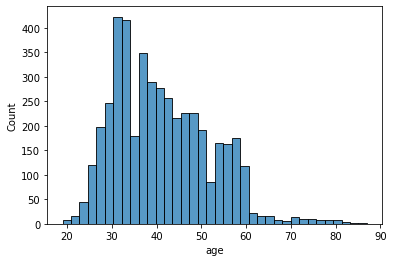

In [42]:
mean_age = df['age'].mean()
print('La edad media es',mean_age)
mode_age = int(df['age'].mode())
print('La moda de la edad es',mode_age)
skew_age = df['age'].skew()
print( 'El coeficiente de asimetría es de', skew_age)
kurt_age = df['age'].kurt()
print( 'La curtosis es', kurt_age)
sns.histplot(df['age']);

**Age:** Representa la edad de cada uno de las personas que hicieron parte de la campaña. Un promedio de edad de 41 años, la edad mas común fue de 34 años.
El coeficiente de asimetría es de 0.69 lo que indica que los valores mas extremos se encuentran por encima de la media.
La curtosis es mayor a cero, lo que indica que la grafica de distribución de los datos es leptocurtica, con cola a la derecha.

#### BALANCE

El monto medio es 1422.6578190665782
La moda del monto es 0
El coeficiente de asimetría es de 6.596430546295735
La curtosis es 88.39033211861796


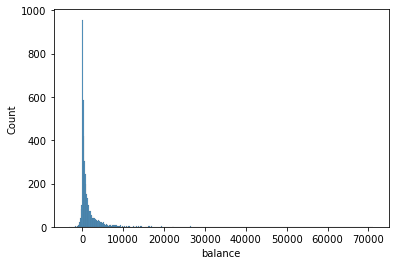

In [43]:
mean_balance = df['balance'].mean()
print('El monto medio es',mean_balance)
mode_balance = int(df['balance'].mode())
print('La moda del monto es',mode_balance)
skew_balance = df['balance'].skew()
print( 'El coeficiente de asimetría es de', skew_balance)
kurt_balance = df['balance'].kurt()
print( 'La curtosis es', kurt_balance)
sns.histplot(df['balance']);

**Balance:** Representa el monto en la cuenta de las personas que estuvieron en la campaña, en promedio tenían saldo de 1.422; la mayoría de personas tenía sus cuentas en ceros.. El coeficiente de asimetría es de 6.59 lo que indica que los valores mas extremos se encuentran por encima de la media. La curtosis es mayor a cero, lo que indica que la grafica de distribución de los datos es leptocurtica, con cola a la derecha.

#### DAY

El dia del mes de mayor contactabilidad 20
El coeficiente de asimetría es de 0.09462690455175846
La curtosis es -1.0395310625320089


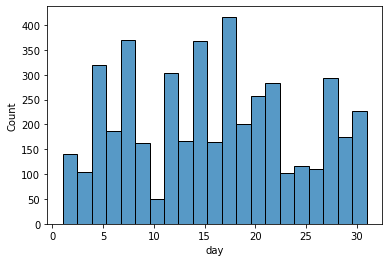

In [44]:
mode_day = int(df['day'].mode())
print('El dia del mes de mayor contactabilidad',mode_day)
skew_day = df['day'].skew()
print( 'El coeficiente de asimetría es de', skew_day)
kurt_day = df['day'].kurt()
print( 'La curtosis es', kurt_day)
sns.histplot(df['day']);

#### DURATION 

Promedio de la duración de llamadas en segundos 263.96129174961294
Duración en segundos que mas se repitió 123
El coeficiente de asimetría es de 2.7724197169136455
La curtosis es 12.530049737749446


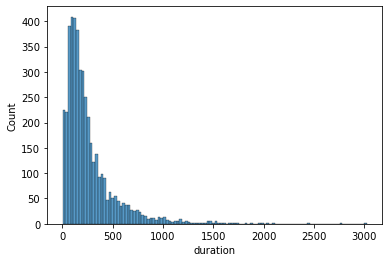

In [45]:
mean_duration = df['duration'].mean()
print('Promedio de la duración de llamadas en segundos',mean_duration)
mode_duration = int(df['duration'].mode())
print('Duración en segundos que mas se repitió',mode_duration)
skew_duration = df['duration'].skew()
print( 'El coeficiente de asimetría es de', skew_duration)
kurt_duration = df['duration'].kurt()
print( 'La curtosis es', kurt_duration)
sns.histplot(df['duration']);

**Duration:** Representa la duración en segundos de las llamadas realizadas en la campaña, en promedio duraban 263 segundos. El coeficiente de asimetría es de 2.77 lo que indica que los valores mas extremos se encuentran por encima de la media. La curtosis es mayor a cero, lo que indica que la grafica de distribución de los datos es leptocurtica, con cola a la derecha.

#### CAMPAIGN

El numero promedio de llamadas en el mes 2.793629727936297
La moda en el numero de llamadas a un mismo cliente 1
El coeficiente de asimetría es de 4.74391446894159
La curtosis es 37.168920102993624


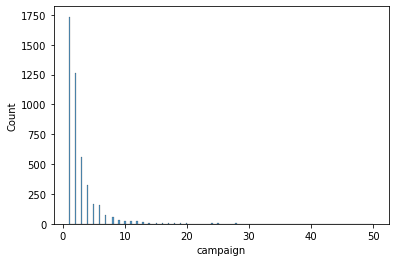

In [46]:
mean_campaign = df['campaign'].mean()
print('El numero promedio de llamadas en el mes',mean_campaign)
mode_campaign = int(df['campaign'].mode())
print('La moda en el numero de llamadas a un mismo cliente',mode_campaign)
skew_campaign = df['campaign'].skew()
print( 'El coeficiente de asimetría es de', skew_campaign)
kurt_campaign = df['campaign'].kurt()
print( 'La curtosis es', kurt_campaign)
sns.histplot(df['campaign']);

**Campaingn:** Representa cantidad de llamadas realizadas en la campaña, en promedio se realizaban 3 llamadas y la mas común era realizar una sola llamada previamente. El coeficiente de asimetría es de 4.74 lo que indica que los valores mas extremos se encuentran por encima de la media. La curtosis es mayor a cero, lo que indica que la grafica de distribución de los datos es leptocurtica, con cola a la derecha.

#### PREVIOUS

Promedio de contatos hechos en campañas anteriores 0.5425790754257908
Numero de contactos hechos a un mismo cliente que mas se repite 0
El coeficiente de asimetría es de 5.875258677896706
La curtosis es 51.995211518308764


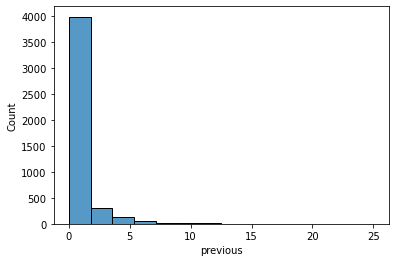

In [47]:
mean_previous = df['previous'].mean()
print('Promedio de contatos hechos en campañas anteriores',mean_previous)
mode_previous = int(df['previous'].mode())
print('Numero de contactos hechos a un mismo cliente que mas se repite',mode_previous)
skew_previous = df['previous'].skew()
print( 'El coeficiente de asimetría es de', skew_previous)
kurt_previous = df['previous'].kurt()
print( 'La curtosis es', kurt_previous)
sns.histplot(df['previous']);

**Previous:** Representa el numero de veces contactados en campañas previas, en promedio 0.54 veces, menos de una llamada, lo mas comun fue cero veces, lo que quiere decir que fueron clientes nuevos. El coeficiente de asimetría es de 5.87 lo que indica que los valores mas extremos se encuentran por encima de la media. La curtosis es mayor a cero, lo que indica que la grafica de distribución de los datos es leptocurtica, con cola a la derecha.

<a name="5_2"></a>
### 5.2 [&#9678;](#5) Calcular las medidas de centralización: el vector de medias. Usar un paquete estadístico o usar la fórmula:
### $$\bar{X}=\ \frac{1}{m}X^t\mathbb{1}$$
### donde $\mathbb{1}$ es un vector de unos de la dimensión adecuada y $X^t$ es la matriz transpuesta de $X$.
<hr style="border:1px solid black"> </hr>

In [48]:
medias = df.mean()
medias

age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64

<a name="5_3"></a>
### 5.3 [&#9678;](#5) Calcular la matriz de varianzas y covarianzas. Usar un paquete estadístico o usar la fórmula:
### $$S=\frac{1}{m}X^tPX$$
### donde la matriz cuadrada $P$ está deﬁnida como $P=I-\frac{1}{m}\mathbb{1}\mathbb{1}^t$. Otra expresión para la matriz de varianzas y covarianzas es a partir de la matriz de datos centrados $\tilde{X}$, así:
### $$S=\frac{1}{m}\tilde{X}^t\tilde{X}$$
### donde $\tilde{X}=X-\mathbb{1}\tilde{X}^t$ es la matriz de datos centrados que se obtiene de restar a cada dato su media. Calcular la matriz de varianzas corregida. Consiste en dividir la matriz de covarianzas por $(m-1)$ en lugar de $m$ para tener un estimador insesgado de la matriz de la población.
### $$\hat{S}=\frac{1}{(m-1)}{\tilde{X}}^t\tilde{X}$$
<hr style="border:1px solid black"> </hr>

In [49]:
cov = df.cov()
pd.DataFrame(cov)

,age,balance,day,duration,campaign,pdays,previous
age,111.856238,2.668043e+03,-1.557268,-6.504919,-0.169314,-9.417378,-0.062886
balance,2668.042729,9.057922e+06,-215.386074,-12474.023425,-93.370853,2843.538053,133.523091
day,-1.557268,-2.153861e+02,68.024016,-52.785802,4.121894,-77.912251,-0.825706
duration,-6.504919,-1.247402e+04,-52.785802,67525.469519,-55.259760,270.064195,7.956848
campaign,-0.169314,-9.337085e+01,4.121894,-55.259760,9.670897,-28.998832,-0.357251
pdays,-9.417378,2.843538e+03,-77.912251,270.064195,-28.998832,10024.239560,97.932173
previous,-0.062886,1.335231e+02,-0.825706,7.956848,-0.357251,97.932173,2.868153


<a name="5_4"></a>
### 5.4 [&#9678;](#5) Centralizar los datos y calcular la matriz de varianzas y covarianzas.
<hr style="border:1px solid black"> </hr>

In [50]:
df2 = df.copy()
df2

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [51]:
for i in range(len(df2.columns)):
    df2.iloc[:,i]=df2.iloc[:,i]-medias[i]
df2

,age,balance,day,duration,campaign,pdays,previous
0,-11.170095,364.342181,3.084716,-184.961292,-1.79363,-40.766645,-0.542579
1,-8.170095,3366.342181,-4.915284,-43.961292,-1.79363,299.233355,3.457421
2,-6.170095,-72.657819,0.084716,-78.961292,-1.79363,290.233355,0.457421
3,-11.170095,53.342181,-12.915284,-64.961292,1.20637,-40.766645,-0.542579
4,17.829905,-1422.657819,-10.915284,-37.961292,-1.79363,-40.766645,-0.542579
...,...,...,...,...,...,...,...
4516,-8.170095,-1755.657819,14.084716,65.038708,2.20637,-40.766645,-0.542579
4517,15.829905,-4735.657819,-6.915284,-110.961292,-1.79363,-40.766645,-0.542579
4518,15.829905,-1127.657819,3.084716,-112.961292,8.20637,-40.766645,-0.542579
4519,-13.170095,-285.657819,-9.915284,-134.961292,1.20637,171.233355,2.457421


In [52]:
cov2 = df2.cov()
pd.DataFrame(cov2)

,age,balance,day,duration,campaign,pdays,previous
age,111.856238,2.668043e+03,-1.557268,-6.504919,-0.169314,-9.417378,-0.062886
balance,2668.042729,9.057922e+06,-215.386074,-12474.023425,-93.370853,2843.538053,133.523091
day,-1.557268,-2.153861e+02,68.024016,-52.785802,4.121894,-77.912251,-0.825706
duration,-6.504919,-1.247402e+04,-52.785802,67525.469519,-55.259760,270.064195,7.956848
campaign,-0.169314,-9.337085e+01,4.121894,-55.259760,9.670897,-28.998832,-0.357251
pdays,-9.417378,2.843538e+03,-77.912251,270.064195,-28.998832,10024.239560,97.932173
previous,-0.062886,1.335231e+02,-0.825706,7.956848,-0.357251,97.932173,2.868153


<a name="5_5"></a>
### 5.5 [&#9678;](#5) Calcular la variabilidad total y la varianza promedio. La variabilidad total es la trasa de la matriz de varianzas y covarianzas. Para la varianza total puede usar la fórmula:
### $$T=tr(S)=\sum_{i=1}^{n}s_{ii}^2$$
### y para la varianza promedio
### $${\bar{s}}^2=\frac{n}{n}\sum_{i=1}^{n}$$
<hr style="border:1px solid black"> </hr>

In [53]:
VT = np.trace(cov)
print('Varibilidad total = ',VT)

fe.Variabilidad_Total(df2) #comparando libreria profe

Varibilidad total =  9135663.876978526


9133643.159465369

In [54]:
print('Variabilidad promedio = ', fe.Varianza_promedio(df2,df2.shape[0]).round(2))

Variabilidad promedio =  2020.27


<a name="5_6"></a>
### 5.6 [&#9678;](#5) Calcule la varianza generalizada y la variabilidad promedio. La varianza generalizada es el determinante de la matriz de covarianzas. Es decir:
### $$VG=|S|$$
### Su raíz cuadrada se denomina *desviación típica generalizada*. Para el cáculo de la variabilidad promedio se usa la fórmula:
### $$VP=|S|^{\frac{1}{n}}$$
<hr style="border:1px solid black"> </hr>

In [55]:
VG = np.linalg.det(cov)
print('Varianza Generalizada = ', VG)

Varianza Generalizada =  8.158548011609915e+20


In [56]:
VP = VG**(1/2)
print('Variabilidad Promedio', VP)

Variabilidad Promedio 28563172113.072308


<a name="5_7"></a>
### 5.7 [&#9678;](#5) Distancia de Mahalanobis Se deﬁne la distancia de Mahalanobis entre un punto y su vector de medias como:
### $$d_i=[(X_i-\bar{X})^tS^{-1}(X_i-\bar{X})]^{1/2}$$

<hr style="border:1px solid black"> </hr>

In [57]:
df2a = np.array(df2)

In [58]:
Ac= df2a
df2.shape

(4521, 7)

In [59]:
Si = np.linalg.inv(fe.Matriz_covarianzas(df2a))
Si.shape

(7, 7)

In [60]:
df2at = df2a.T
df2at.shape

(7, 4521)

In [61]:
M2 = df2a@Si@df2at
M2

array([[ 2.46408328e+00,  4.30456004e-03,  1.86313310e-01, ...,
        -2.97058379e+00,  1.05820930e-01, -2.26259184e+00],
       [ 4.30456004e-03,  1.11649919e+01,  8.53805003e+00, ...,
        -3.62942260e+00,  6.50460090e+00,  7.35554444e+00],
       [ 1.86313310e-01,  8.53805003e+00,  1.20004102e+01, ...,
        -2.66782672e+00,  4.27593874e+00, -1.06646306e-01],
       ...,
       [-2.97058379e+00, -3.62942260e+00, -2.66782672e+00, ...,
         9.56518330e+00, -9.57462171e-01, -6.75819901e-01],
       [ 1.05820930e-01,  6.50460090e+00,  4.27593874e+00, ...,
        -9.57462171e-01,  6.70386389e+00,  6.51978940e+00],
       [-2.26259184e+00,  7.35554444e+00, -1.06646306e-01, ...,
        -6.75819901e-01,  6.51978940e+00,  1.66093860e+01]])

<a name="6"></a><hr style="border:1px solid black"> </hr>
# Numeral 6 [&#9673;](#conte)
### Análisis de dependencias lineales

1. [Apartado 1](#6_1)
2. [Apartado 2](#6_2)
3. [Apartado 3](#6_3)
4. [Apartado 4](#6_4)

<hr style="border:1px solid black"> </hr>

Se denomina matriz de precisión a la inversa de la matriz de varianzas y covarianzas. Un resultado importante es que la matriz de precisión contiene la información sobre la relación multivariante entre cada una de las variables y el resto.

Uno de los objetivos más importantes de la descripción de los datos multivariantes es comprender la estructura de dependencias entre las variables.

Para esta actividad tome el archivo de datos *ELE.xlsx* disponible en la página web del curso.

In [62]:
df = pd.read_excel('ELE.xlsx').iloc[:,:-2]
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure


<a name="6_1"></a>
### 6.1 [&#9678;](#6) Analizar la correlación entre pares de variables.

<hr style="border:1px solid black"> </hr>

In [63]:
data = np.array(df)
data_x = data[ :, 1:len(data)]
# correlacion
#np.corrcoef(data, axis=0) # Crea matriz de correlación.
data_x

array([['unemployed', 'married', 'primary', ..., -1, 0, 'unknown'],
       ['services', 'married', 'secondary', ..., 339, 4, 'failure'],
       ['management', 'single', 'tertiary', ..., 330, 1, 'failure'],
       ...,
       ['technician', 'married', 'secondary', ..., -1, 0, 'unknown'],
       ['blue-collar', 'married', 'secondary', ..., 211, 3, 'other'],
       ['entrepreneur', 'single', 'tertiary', ..., 249, 7, 'other']],
      dtype=object)

In [64]:
df_num = df._get_numeric_data()
df_num

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [65]:
data = np.array(df_num)
data

array([[  30, 1787,   19, ...,    1,   -1,    0],
       [  33, 4789,   11, ...,    1,  339,    4],
       [  35, 1350,   16, ...,    1,  330,    1],
       ...,
       [  57,  295,   19, ...,   11,   -1,    0],
       [  28, 1137,    6, ...,    4,  211,    3],
       [  44, 1136,    3, ...,    2,  249,    7]], dtype=int64)

In [66]:
print(fe.correlaciones(data).round(2))
print('la maxima correlación aparece entre la quinta y la sexta variable', '0.58')

[[ 1.    0.08 -0.02 -0.   -0.01 -0.01 -0.  ]
 [ 0.08  1.   -0.01 -0.02 -0.01  0.01  0.03]
 [-0.02 -0.01  1.   -0.02  0.16 -0.09 -0.06]
 [-0.   -0.02 -0.02  1.   -0.07  0.01  0.02]
 [-0.01 -0.01  0.16 -0.07  1.   -0.09 -0.07]
 [-0.01  0.01 -0.09  0.01 -0.09  1.    0.58]
 [-0.    0.03 -0.06  0.02 -0.07  0.58  1.  ]]
la maxima correlación aparece entre la quinta y la sexta variable 0.58


<a name="6_2"></a>
### 6.2 [&#9678;](#6) Análizar dependecia entre una variable y todas las demás. En este caso encontrar las betas de la regresión múltiple de la variable que mejor se puede explicar a partir de las demás.


<hr style="border:1px solid black"> </hr>

In [67]:
##coeficiente de determinación o coeficiente de correlación múltiple
##los términos diagonales de la inversa de la matriz de covarianzas son precisamente las inversas 
#de las varianzas residuales de la regresión de cada variable con el resto.

##La matriz $S^{-1}$ es
s_menos_uno = np.linalg.inv(fe.Matriz_covarianzas(data))
s_menos_uno.round(2)

array([[ 0.01, -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  ,  0.02,  0.  , -0.01,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  , -0.01,  0.  ,  0.11,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.01],
       [ 0.  , -0.  ,  0.  , -0.  ,  0.  , -0.01,  0.52]])

In [68]:
DD = np.diag(s_menos_uno)*np.diag(fe.Matriz_covarianzas(data))
print(DD.round(4))
print('')
DD_inverso = DD**-1
print(DD_inverso.round(4))
print('')
print('')
print('Estos son los coeficientes de correlacion multiple entre cada variable y el resto:')
print('')
print('')
UNO_menos_DD_inverso = 1 - DD_inverso
print(UNO_menos_DD_inverso.round(4))
print('')
print('')
print('La variable mas predecible por el resto es la edad R2 = 0.9946')
print('En otros terminos, el resto de las variables explica el 99.46% de la variabilidad de esta variable')

[1.0075 1.0082 1.0338 1.0054 1.0377 1.5137 1.5023]

[0.9925 0.9919 0.9673 0.9946 0.9637 0.6606 0.6657]


Estos son los coeficientes de correlacion multiple entre cada variable y el resto:


[0.0075 0.0081 0.0327 0.0054 0.0363 0.3394 0.3343]


La variable mas predecible por el resto es la edad R2 = 0.9946
En otros terminos, el resto de las variables explica el 99.46% de la variabilidad de esta variable


esto se significa que se puede hacer un modelo estadistico de regresion lineal multiple de la edad tomando las demas variables como variables explicativas 

en cambio para la variable menos predecible es la variable paydays ya que su coeficiente de correlacion R2= 0.6606 es el menor de todas las variables,

<a name="6_3"></a>
### 6.3 [&#9678;](#6) Analizar la correlacion entre pares de variables pero eliminando el efecto de las demás variables.

<hr style="border:1px solid black"> </hr>

In [69]:
matrizCovarianzasInev = np.linalg.inv(fe.Matriz_covarianzas(data))
P = fe.estandariza_matriz(matrizCovarianzasInev)
P

array([[ 2.44890144, -0.68234865, -0.19337474, -0.25897216, -0.39590019,
         0.36933969, -0.40700555],
       [-0.42566197,  0.50963134, -0.22744023, -0.27497452, -0.3980132 ,
         0.36337428, -0.40713678],
       [-0.35909067,  0.55314142,  2.28824666, -0.082201  , -0.56041066,
         0.41732856, -0.40577826],
       [-0.42463785,  0.47101201, -0.22639925,  0.16737679, -0.39586988,
         0.36350346, -0.40731741],
       [-0.39906216,  0.86073718, -1.24251888,  2.16023125,  2.44330275,
         0.48707099, -0.38712196],
       [-0.42135214,  0.4743684 , -0.21125842, -0.26776625, -0.39209126,
         0.44654623, -0.43492546],
       [-0.41909664, -2.1865417 , -0.18725513, -1.44369409, -0.30101756,
        -2.44716321,  2.44928542]])

In [70]:
def correlacionesParciales(x):
    """
    funcion para calcular las correlaciones entre pares de variables
    """
    SdiaINV = np.diag(np.linalg.inv(fe.Matriz_covarianzas(x)))**-0.5 #son las varianzas poblacionales
    matriz_D = np.diag(SdiaINV,0) #matriz cuadrada diagonal cuya diagonal es Sdia
    intermedio = matriz_D.dot(np.linalg.inv(fe.Matriz_covarianzas(x)))
    CorrelP = -1*intermedio.dot(matriz_D)
    return CorrelP

In [71]:
correlacionesParciales(data).round(2)

array([[-1.  ,  0.08, -0.02, -0.  , -0.  , -0.01, -0.  ],
       [ 0.08, -1.  , -0.01, -0.02, -0.01, -0.01,  0.03],
       [-0.02, -0.01, -1.  , -0.01,  0.15, -0.06, -0.  ],
       [-0.  , -0.02, -0.01, -1.  , -0.06, -0.01,  0.01],
       [-0.  , -0.01,  0.15, -0.06, -1.  , -0.06, -0.02],
       [-0.01, -0.01, -0.06, -0.01, -0.06, -1.  ,  0.57],
       [-0.  ,  0.03, -0.  ,  0.01, -0.02,  0.57, -1.  ]])

In [72]:
fe.Matriz_covarianzas(data)

array([[ 1.11831497e+02,  2.66745259e+03, -1.55692404e+00,
        -6.50348006e+00, -1.69276988e-01, -9.41529521e+00,
        -6.28717781e-02],
       [ 2.66745259e+03,  9.05591823e+06, -2.15338433e+02,
        -1.24712643e+04, -9.33502001e+01,  2.84290909e+03,
         1.33493557e+02],
       [-1.55692404e+00, -2.15338433e+02,  6.80089701e+01,
        -5.27741264e+01,  4.12098212e+00, -7.78950177e+01,
        -8.25523604e-01],
       [-6.50348006e+00, -1.24712643e+04, -5.27741264e+01,
         6.75105336e+04, -5.52475370e+01,  2.70004460e+02,
         7.95508767e+00],
       [-1.69276988e-01, -9.33502001e+01,  4.12098212e+00,
        -5.52475370e+01,  9.66875836e+00, -2.89924177e+01,
        -3.57171803e-01],
       [-9.41529521e+00,  2.84290909e+03, -7.78950177e+01,
         2.70004460e+02, -2.89924177e+01,  1.00220223e+04,
         9.79105112e+01],
       [-6.28717781e-02,  1.33493557e+02, -8.25523604e-01,
         7.95508767e+00, -3.57171803e-01,  9.79105112e+01,
         2.8675190

In [73]:
np.linalg.inv(fe.Matriz_covarianzas(data)).round(3)

array([[ 0.009, -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [ 0.   ,  0.   ,  0.015,  0.   , -0.006,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [ 0.   ,  0.   , -0.006,  0.   ,  0.107,  0.   ,  0.004],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.005],
       [ 0.   , -0.   ,  0.   , -0.   ,  0.004, -0.005,  0.524]])

In [74]:
-1*np.diag(np.linalg.inv(fe.Matriz_covarianzas(data)))

array([-9.00920206e-03, -1.11331662e-07, -1.52012126e-02, -1.48922563e-05,
       -1.07327194e-01, -1.51038943e-04, -5.23890520e-01])

estos son los coeficientes de correlacion multiples

<a name="6_4"></a>
### 6.4 [&#9678;](#6) Analizar el conjunto completo de todas las variables.

<hr style="border:1px solid black"> </hr>

In [75]:
Det = np.linalg.det(fe.correlaciones(data))
f = (len(fe.correlaciones(data))-1)
D = 1 - Det**(1/f)
D

0.07399726370672766

Se concluye que globalmente, la dependencia lineal explica $0.74\%$ de la variabilidad de este conjunto de datos.

<a name="7"></a><hr style="border:1px solid black"> </hr>
# Numeral 7 [&#9673;](#conte)
### Problema de clasiﬁcación

1. [Lectura y entendimiento de datos](#7_1)
2. [Exploracion de Variables Categoricas - Binarias](#7_2)
3. [Exploracion de Variables Numericas](#7_3)
4. [Eliminacion de Variables por analisis grafico](#7_4)
5. [Eliminacion de Variables por analisis de dependencias lineales](#7_5)
6. [Preparacion de Datos](#7_6)
7. [Division Entrenamiento - Testeo](#7_7)
8. [Arbol de decision](#7_8)
9. [K-NN](#7_9)

<hr style="border:1px solid black"> </hr>

Use el método de su escogencia para entrenar un clasiﬁcador con los datos del archivo *ELE2.xlsx*. Considere eliminar variables de acuerdo al ejercicio anterior. Evalue la precisión y exponga el error de entrenamiento y de testeo.

<a name="7_1"></a>
### 7.1 [&#9678;](#7) Lectura y entendimiento de datos:

<hr style="border:1px solid black"> </hr>

- Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa.
- Las campañas de marketing se basaron en llamadas telefónicas.
- En ocasiones requería más de un contacto con el mismo cliente, para poder saber si el producto (depósito a plazo bancario) se había tomado o no.

In [76]:
df = pd.read_excel('ELE2.xlsx').iloc[:,:-2]
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


**Descripcion de las variables**

|VARIABLE|TIPO|DESCRIPCION|
|:-| |-:|
|age|Numerica|Edad de la persona|
|job|Categorica|Tipo de Trabajo:  "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services"|
|marital|Categorica|estatus marital: "married","divorced","single"; note: "divorced" significa divorciado o viud@)|
|education|Categorical|Nivel de Educacion: "unknown","secondary","primary","tertiary"|
|default|Binaria|Tiene Credito en mora: "yes","no"|
|balance|Numerica|Saldo promedio anual en euros|
|housing|Binaria|tiene préstamo de vivienda: "yes","no"|
|loan|Binaria|Tiene un prestamo personal: "yes","no"|
|contact|Categorica|Tipo de comunicacion:  "unknown","telephone","cellular"|
|day|Numerica|dia del mes de el ultimo contacto|
|month|Categorica|mes del ultimo contacto: "jan", "feb", "mar", ..., "nov", "dec"|
|duration|Numerica|Duracion de la ultima llamada en segundos|
|campaign|Numerica|Número de contactos realizados durante esta campaña y para este cliente|
|pdays|Numerica|Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior -1 means client was not previously contacted|
|previus|Numerica|Número de contactos realizados antes de esta campaña y para este cliente|
|poutcome|Categorica|Resultado de la campaña de marketing anterior: "unknown","other","failure","success"|

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [78]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


<a name="7_2"></a>
### 7.2 [&#9678;](#7) Exploracion de Variables Categoricas - Binarias:

<hr style="border:1px solid black"> </hr>

In [79]:
def grafica_cat(variable):
    df_temp = df[[variable,'y']]
    df_temp = df_temp.groupby([variable,'y']).size().reset_index(name='count').sort_values(['count'],ascending=False)
    plot = sns.catplot(x='count',y = variable,col='y',data=df_temp,kind='bar',orient='h',palette='Dark2',height=4.4,aspect=1.3)
    return df_temp,plot

,job,y,count
2,blue-collar,no,877
8,management,no,838
18,technician,no,685
0,admin.,no,420
14,services,no,379
10,retired,no,176
12,self-employed,no,163
4,entrepreneur,no,153
9,management,yes,131
20,unemployed,no,115


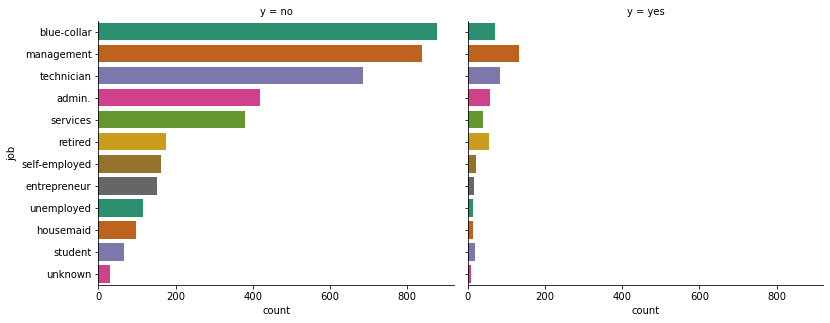

In [80]:
df_temp,plot=grafica_cat('job')
df_temp

,marital,y,count
2,married,no,2520
4,single,no,1029
0,divorced,no,451
3,married,yes,277
5,single,yes,167
1,divorced,yes,77


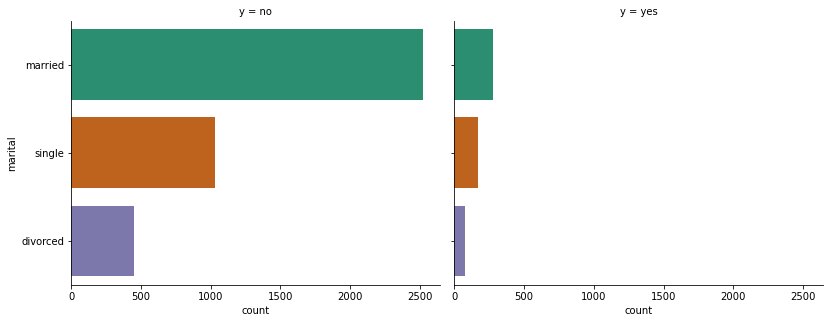

In [81]:
df_temp,plot=grafica_cat('marital')
df_temp

,education,y,count
2,secondary,no,2061
4,tertiary,no,1157
0,primary,no,614
3,secondary,yes,245
5,tertiary,yes,193
6,unknown,no,168
1,primary,yes,64
7,unknown,yes,19


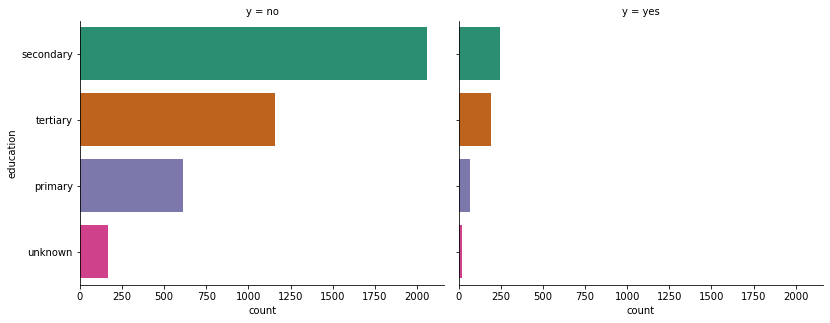

In [82]:
df_temp,plot=grafica_cat('education')
df_temp

,default,y,count
0,no,no,3933
1,no,yes,512
2,yes,no,67
3,yes,yes,9


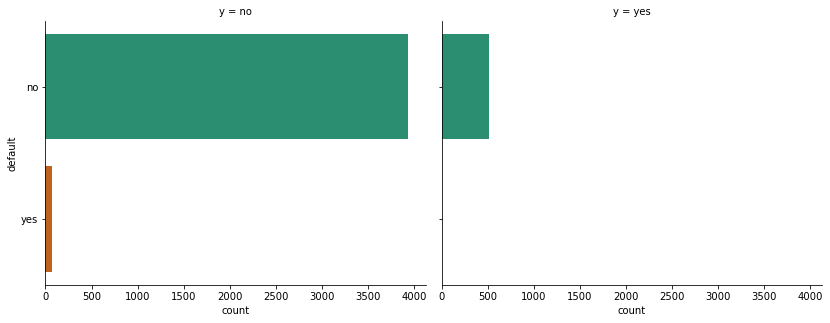

In [83]:
df_temp,plot=grafica_cat('default')
df_temp

,housing,y,count
2,yes,no,2339
0,no,no,1661
1,no,yes,301
3,yes,yes,220


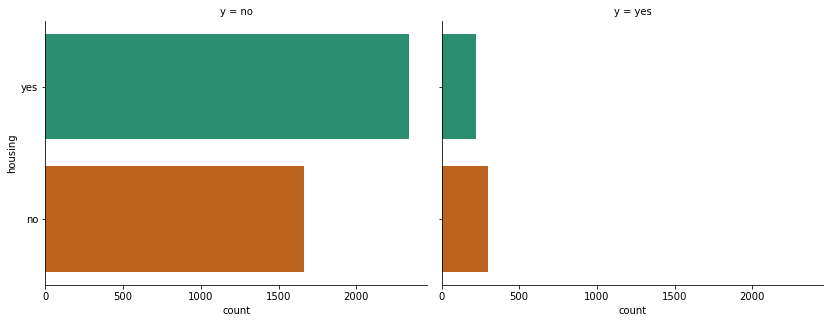

In [84]:
df_temp,plot=grafica_cat('housing')
df_temp

,loan,y,count
0,no,no,3352
2,yes,no,648
1,no,yes,478
3,yes,yes,43


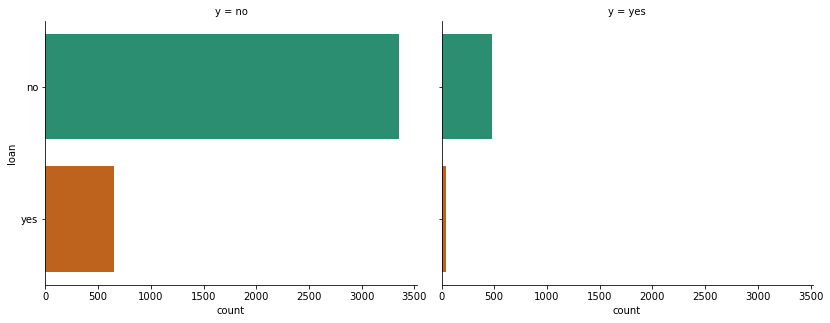

In [85]:
df_temp,plot=grafica_cat('loan')
df_temp

,contact,y,count
0,cellular,no,2480
4,unknown,no,1263
1,cellular,yes,416
2,telephone,no,257
5,unknown,yes,61
3,telephone,yes,44


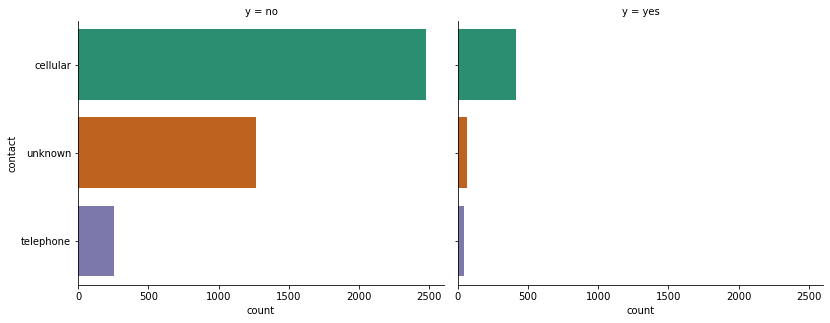

In [86]:
df_temp,plot=grafica_cat('contact')
df_temp

,month,y,count
16,may,no,1305
10,jul,no,645
2,aug,no,554
12,jun,no,476
18,nov,no,350
0,apr,no,237
6,feb,no,184
8,jan,no,132
17,may,yes,93
3,aug,yes,79


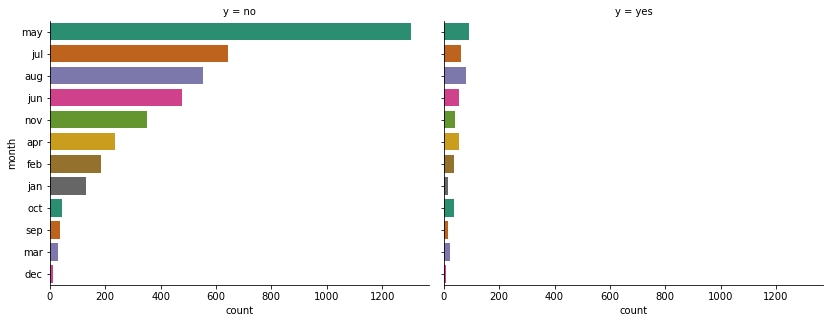

In [87]:
df_temp,plot=grafica_cat('month')
df_temp

,poutcome,y,count
6,unknown,no,3368
0,failure,no,427
7,unknown,yes,337
2,other,no,159
5,success,yes,83
1,failure,yes,63
4,success,no,46
3,other,yes,38


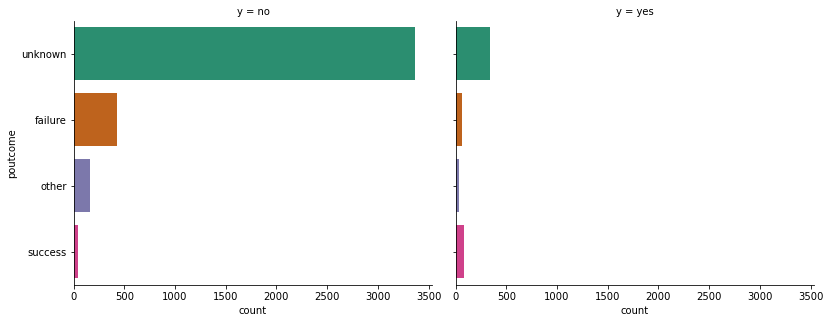

In [88]:
df_temp,plot=grafica_cat('poutcome')
df_temp

<a name="7_3"></a>
### 7.3 [&#9678;](#7) Exploracion de Variables Numericas:

<hr style="border:1px solid black"> </hr>

In [89]:
df_num = df._get_numeric_data()
df_num['y'] = df['y'].copy()
df_num.y = df_num.y.map(dict(yes=1, no=0))

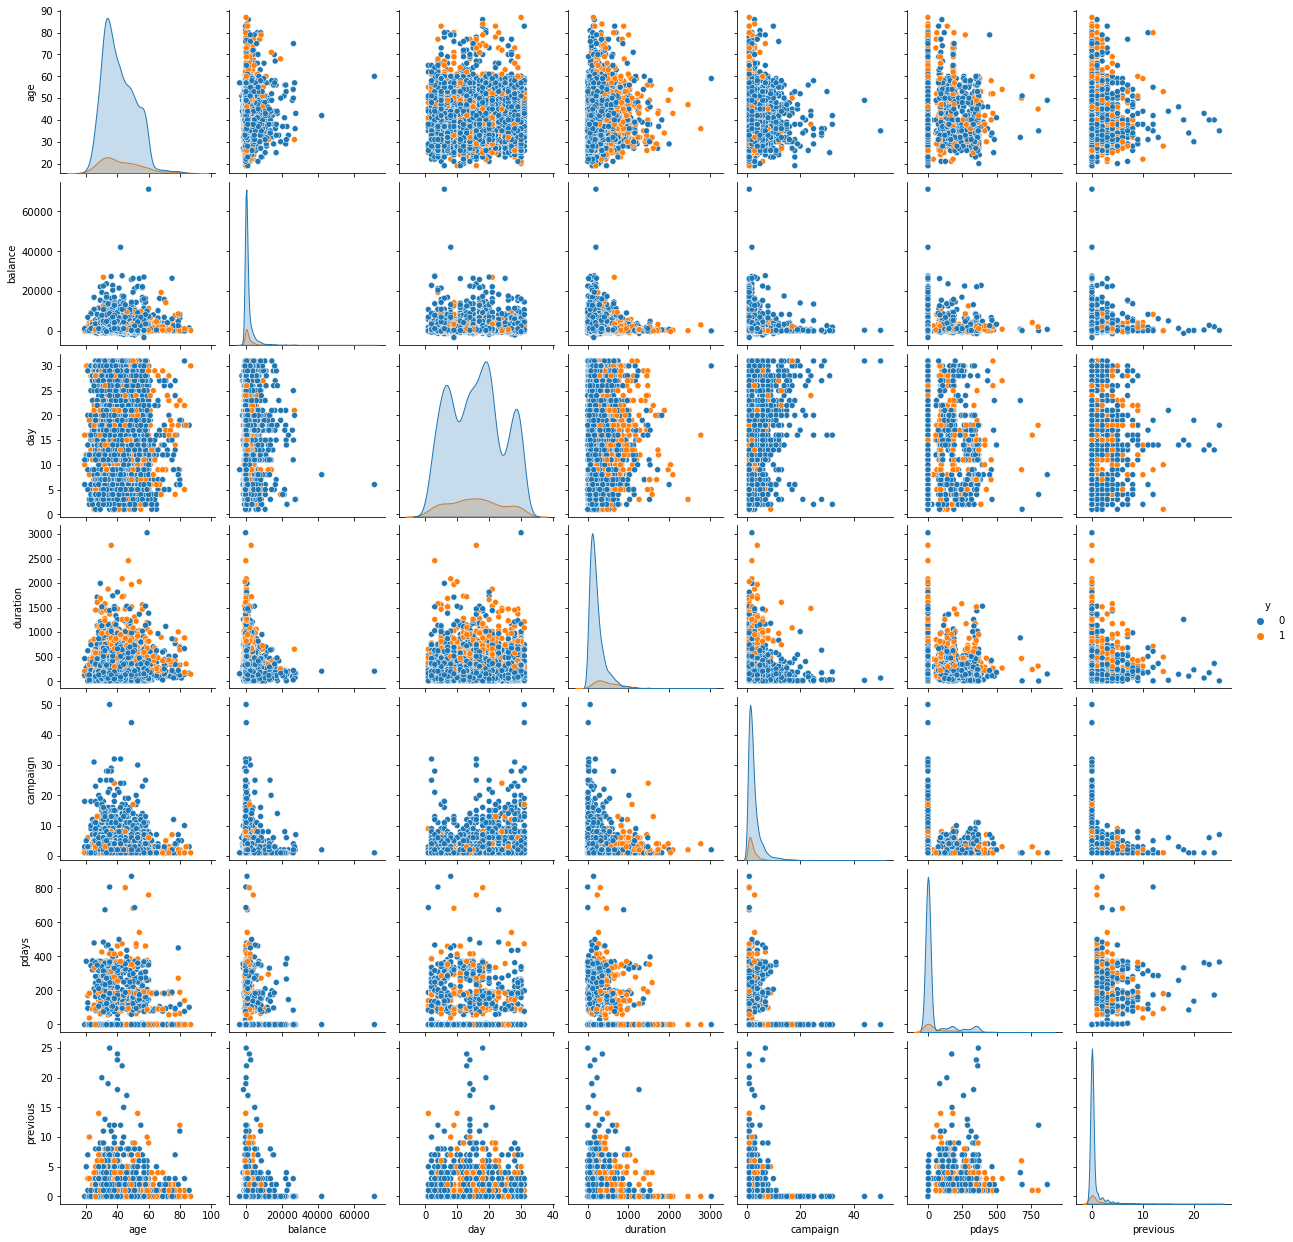

In [90]:
sns.pairplot(df_num, hue="y")
plt.show()

<a name="7_4"></a>
### 7.4 [&#9678;](#7) Eliminacion de Variables por analisis grafico:

<hr style="border:1px solid black"> </hr>

- En la variable **poutcome** la mayoria de los datos son de categoria 'Desconocido' por lo que esta no sera de mucho valos para el modelo por lo que es eliminada

In [91]:
del df['poutcome']

<a name="7_5"></a>
### 7.5 [&#9678;](#7) Eliminacion de Variables por analisis de dependencias lineales:

<hr style="border:1px solid black"> </hr>

Como se observa en el punto 6 no hay dependencias lineales entre las variables por lo que no se elimina ninguna para la elaboracion del modelo

se hicieron varias pruebas removiendo diferentes variables segun las dependencias lineales pero los cambios son minimos, Primero se deben balancear los datos

<a name="7_6"></a>
### 7.6 [&#9678;](#7) Preparacion de Datos:

<hr style="border:1px solid black"> </hr>

### Trasformacion de datos binarios a Numericos

In [92]:
binarias = ['default','housing','loan','y']

In [93]:
for i in binarias:
    df[i] = df[i].map(dict(yes=1, no=0))
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,0


### Trasformacion de datos Categoricos a numericos

In [94]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
cat_cols

['job', 'marital', 'education', 'contact', 'month']

In [95]:
df = pd.get_dummies(df, columns = cat_cols)
df.head(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0


### Normalizacion

In [96]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)
df.head(3)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.0,0.389908,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.0,0.379587,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name="7_7"></a>
### 7.7 [&#9678;](#7) Division Entrenamiento - Testeo:

<hr style="border:1px solid black"> </hr>

In [97]:
Y = np.array(df['y'])
X = np.array(df.loc[:, df.columns != 'y'])

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=123)

<a name="7_8"></a>
### 7.8 [&#9678;](#7) Arbol de decision

<hr style="border:1px solid black"> </hr>

In [99]:
max_profundidad = range(3,15,1)
scores = []
algs = []
preds = []
for i in max_profundidad:
    Tree = DecisionTreeClassifier(max_depth = i,random_state=123, splitter='random', max_features= 'log2')
    Tree.fit(X_train,Y_train)
    predTree = Tree.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, predTree))
    algs.append(Tree)
    preds.append(predTree)

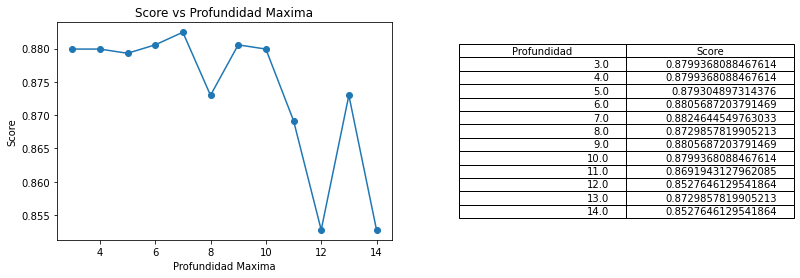

In [100]:
plt.plot(max_profundidad,scores,'-o')
plt.title('Score vs Profundidad Maxima')
plt.xlabel('Profundidad Maxima')
plt.ylabel('Score')
plt.table(cellText=np.column_stack([max_profundidad,scores]), colLabels=['Profundidad','Score'],loc='right',bbox=[1.2,0.1,1,.8])
plt.show()

la mayor eficiencia del modelo se alcanza cuando la maxima profundidad esta fijada en 7 por lo que recuperamos los datos de este casso para analizar a mayor profundidad los resultados

In [101]:
best = 7

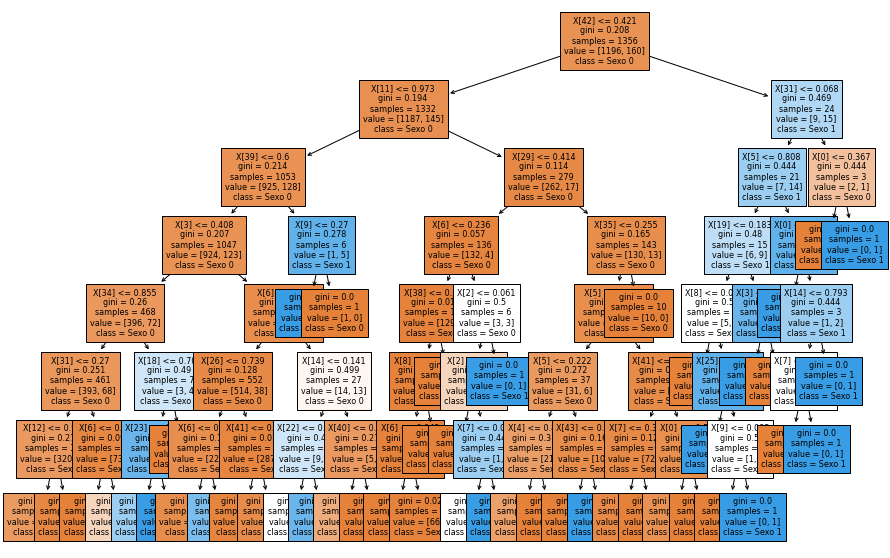

In [102]:
alg = algs[best-3]
# Graficamos el arbol de decision 
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(alg, ax=ax, filled = True,fontsize=8, class_names = ['Sexo 0','Sexo 1'])
plt.show()

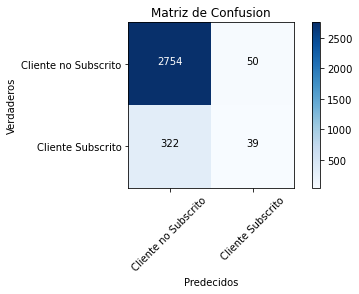

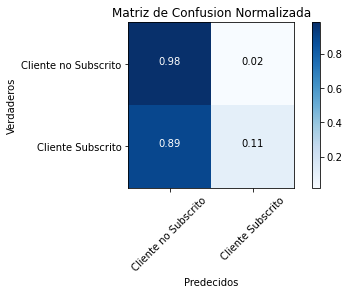

In [103]:
prediccion = preds[best-3]
cm = confusion_matrix(Y_test, prediccion)
plot_conf_matrix(cm, classes=["Cliente no Subscrito","Cliente Subscrito"],
                 normalize= False,  title='Matriz de Confusion')
plot_conf_matrix(cm, classes=["Cliente no Subscrito","Cliente Subscrito"],
                 normalize= True,  title='Matriz de Confusion Normalizada')

### Conclusion

A pesar de que se presenta una muy buena eficiencia en el modelo analizando la matriz de confusion se dan muchos Falsos Negativos lo que indica que el modelo no es eficiente para determinar si un cliente se ha suscrito 

<a name="7_9"></a>
### 7.9 [&#9678;](#7) K-NN

<hr style="border:1px solid black"> </hr>

In [104]:
ks = range(2,15,1)
scores = []
algs = []
preds = []
for i in ks:
    algoritmo = KNeighborsClassifier(n_neighbors = i)
    algoritmo.fit(X_train,Y_train)
    predic = algoritmo.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, predic))
    algs.append(algoritmo)
    preds.append(predic)

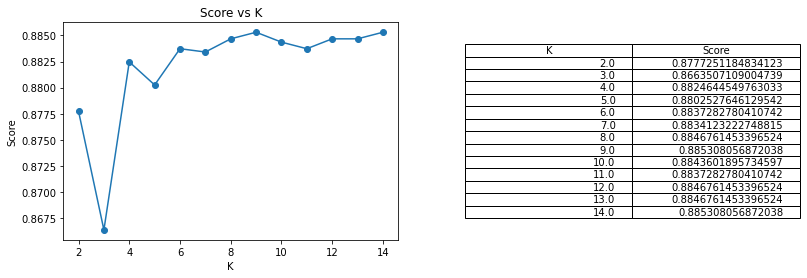

In [105]:
plt.plot(ks,scores,'-o')
plt.title('Score vs K')
plt.xlabel('K')
plt.ylabel('Score')
plt.table(cellText=np.column_stack([ks,scores]), colLabels=['K','Score'],loc='right',bbox=[1.2,0.1,1,.8])
plt.show()

se observa un score adecuado con $K=6$ el cual es eficiente computacionalmente ya que a partir de este punto el aumento en el score no es muy determinante por lo que esta es la solucion computacionalmente mas eficiente con un score satisfactorio

In [106]:
best = 6

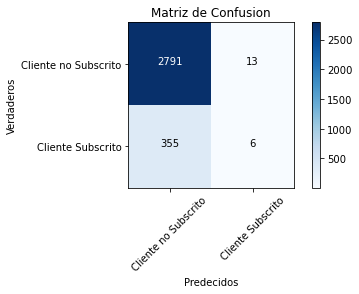

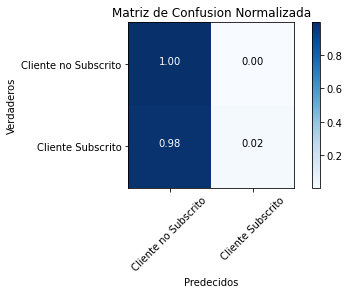

In [107]:
prediccion = preds[best-2]
alg = algs[best-2]
cm = confusion_matrix(Y_test, prediccion)
plot_conf_matrix(cm, classes=["Cliente no Subscrito","Cliente Subscrito"],
                 normalize= False,  title='Matriz de Confusion')
plot_conf_matrix(cm, classes=["Cliente no Subscrito","Cliente Subscrito"],
                 normalize= True,  title='Matriz de Confusion Normalizada')

### Conclusion

A pesar de que se presenta una muy buena eficiencia en el modelo analizando la matriz de confusion se dan muchos Falsos Negativos lo que indica que el modelo no es eficiente para determinar si un cliente se ha suscrito, esto se puede deber a que los datos para entrenar el modelo no se han balanceado, esto quiere decir que hay muchos registros de clientes que no se suscribieron mientras se precentan muy pocos de clientes suscritos, esto nos lleva a esta particularidad de que aunque aperentemente se tenga una buena eficiencia el modelo no es correcto del todo, para corregir esto se debe "Balancear" los datos lo que significa igualar o aproximar el numero de registros de usuarios que se suscribvieron y los que no

<a name="8"></a><hr style="border:1px solid black"> </hr>
# Numeral 8 [&#9673;](#conte)
### Relaciones teóricas

1. [Apartado 1](#8_1)
2. [Apartado 2](#8_2)

<hr style="border:1px solid black"> </hr>

Formalmente la regla **k-NN** se deﬁne como:

$$g_n(x)=\left\{\begin{matrix}1&si\ \sum_{i=1}^{n}{w_{n_i}I_{\left\{Y_i=1\right\}}}>\sum_{i=1}^{n}{w_{n_i}I_{\left\{Y_i=0\right\}}}\\0&en\ otro\ caso\\\end{matrix}\right.$$

donde $w_{n_i}=1/k$ si $X_i$ está entre los $k$ vecinos más próximos de $x$, y $w_{n_i}=0$ en otro caso. Se dice que $X_i$ es el *k-ésimo* vecino más próximo de $x$ si la distancia $||x-X_i||$ es la *k-ésima* más pequeña entre $||x-X_1||,\dots,||x-X_n||$. La decisión sobre la clase se basa en la votación de la mayoría.

En esta actividad te puedes guiar por experimentos numéricos para comprobar que los resultados se cumplen. Cuando te hayas convencido intenta generalizar por medio de la demostración.

<a name="8_1"></a>
### 8.1 [&#9678;](#8) Demuestre que: $$L_{NN}\le 2L^*$$

<hr style="border:1px solid black"> </hr>

**Teorema:** Sea $X$ una variable aleatoria real y sea $f(x)$ y $g(x)$ funciones monótonas no decrecientes entonces:

$$E\{f(X)g(X)\}≥E\{f(X)\}E\{g(X)\}$$

Teniendo en cuenta que todas las condiciones se cumplen. Si $f(x)$ es monótona creciente y $g(x)$ es monótona decreciente, entonces:

$$E\{f(X)g(X)\}≤E\{f(X)\}E\{g(X)\}\ \ \ \  (i)$$

Demostrando que $L_{NN}≤2L^*$

El error asintótico de la regla del vecino más cercano es:

$$L_{NN}=E\{2η(X)(1-η(X))\}$$

Claramente:

$$2η(1-η)≥min(η,1-η)$$

Como:

$$2max(η,1-η)≥1$$

También usamos la notación:

$$A=min(η(X),1-η(X)) \ \ \ \ (ii)$$

Entonces tenemos:

$$L^*≤L_{NN}$$

$$L_{NN}=E\{2η(X)(1-η(X))\}$$

$$L_{NN}=2E\{η(X)(1-η(X))\}$$

De $(ii)$:

$$L_{NN}=2E\{A(1-A)\}$$

De $(i)$:

$$L_{NN}=2E\{A(1-A)\}≤2E\{A\}E\{1-A\}$$

$$L_{NN}≤2L^*(1-L^*)≤2L^*$$

Entonces:

$$L_{NN}≤2L^*$$

<a name="8_2"></a>
### 8.2 [&#9678;](#8) Demuestre que: $$L_{kNN}\le L^*\left(1+\sqrt{\frac{2}{k}}\right)$$

<hr style="border:1px solid black"> </hr>

Para realizar la demostración primero demostramos que:

$$L_{kNN}≤L^*+\sqrt{\frac{(2L_NN)}{k}}$$

Notamos que para $p=1⁄2$, con $B$ distribuida binomialmente con parámetros $(k,p)$ tenemos:

$$B~binomial(k,p)$$

$$P\{B>k/2\}=P\{B-kp>k(1/2-p)\}$$

Por la desigualdad de Markov:

$$P\{B>k/2\}≤\frac{E\{|B-kp|\}}{k(1⁄2-p)}$$

Por la desigualdad de Cauchy-Schwarz:

$$P\{B>k/2\}≤\frac{\sqrt{(Var{B} )}}{k(1⁄2-p)}$$

$$P\{B>k/2\}=\frac{2\sqrt{(p(1-p))}}{\sqrt{k}(1-2p)}$$

Por tanto:

$$L_{kNN}-L^*≤ E\{\frac{2}{\sqrt{k}}\sqrt{\{η(X)(1-η(X))\}}\}$$

$$L_{kNN}-L^*≤ \frac{2}{\sqrt{k}}\sqrt{E\{η(X)(1-η(X))\}}$$

Por la desigualdad de Jensen:

$$L_{kNN}-L^*=\frac{2}{\sqrt{k}}\sqrt{\frac{L_{NN}}{2}}$$

$$L_{kNN}-L^*=\sqrt{\frac{2L_{NN}}{k}}$$

De la demostración del punto anterior sabemos que:

$$L_{NN}≤2L^*$$

Entonces:

$$L_{NN}≤2L^*≤(L^*)^2$$

Tenemos:

$$L_{kNN}-L^*≤\sqrt{\frac{2(L^*)^2}{k}}$$

$$L_{kNN}≤L^*+\sqrt{\frac{2(L^*)^2}{k}}$$

$$L_{kNN}≤L^*+L^*\sqrt{\frac{2}{k}}$$

y finalmente:

$$L_{kNN}\le L^*\left(1+\sqrt{\frac{2}{k}}\right)$$

<hr style="border:2px solid #004B85"> </hr>